## INTEGRANTES: Bruno Herrera, Estela Alvarez, Julio Rueda.

# Preprocesamiento 1: Limpieza individual

In [1]:
!pip install pyod


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install umap


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install umap-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install missingno


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import umap
import umap.umap_ as umap

import missingno as msno
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import plotly.graph_objects as go
import plotly.express as px


import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import normalized_mutual_info_score, v_measure_score, adjusted_rand_score

Se realizará el proceso de limpieza a cada dataset antes de seleccionar el rango de atributos que se usará para el proyecto. Esto se debe a que durante el desarrollo del proyecto se puede reconsiderar qué atributos serán utilizados. Por lo tanto, es conveniente tener datasets limpios para facilitar su uso.

## Dataset Hogar

### Características generales

In [6]:
###características del hogar módulo 100
df_hogar = pd.read_csv('Hogar.csv', encoding = 'ISO-8859-1')

In [7]:
df_hogar.shape

(44378, 338)

Dimensiones iniciales del dataset hogar

In [8]:
df_hogar.dtypes.to_frame().T

AÑO    MES CONGLOME VIVIENDA  HOGAR UBIGEO DOMINIO ESTRATO PERIODO  \
0  int64  int64    int64    int64  int64  int64   int64   int64   int64   

  TIPENC  ...    NBI4    NBI5 FACTOR07 NCONGLOME SUB_CONGLOME CODCCPP NOMCCPP  \
0  int64  ...  object  object  float64     int64        int64   int64  object   

  LONGITUD  LATITUD  ALTITUD  
0  float64  float64  float64  

[1 rows x 338 columns]

A priori, se observa una variedad significativa de tipos de datos. Estos serán revisados con detalle más adelante.

### Tratamiento de valores nulos

In [9]:
sum(df_hogar.isnull().sum() > 0)

0

Una búsqueda rápida indica que no existen valores nulos en el dataframe. No obstante, es necesario corroborar esto realizando una búsqueda manual de datos que representen el vacío en la data.

In [10]:
for col in df_hogar.columns:
    print(df_hogar[col].unique())

[2023]
[ 2  8  1  5  6  3 10 12  9  4  7 11]
[ 5007  5027  5030 ... 20669 20670 21001]
[  3  12  22  31  50  62  69  90   6  18  44  55  65  78   2  11  37  45
  56  60  53  83 101 114   4  13  33  40  47  10  34  58  70  15  16  61
  63  64  66  67   9  57  59  35  36  38 115 116 117 118  20  30  48  72
  82  96  25  28 110 111 119 120 121  19  42  52  87  98  29  76  97 109
   1  88 124  24  85  51   7  46 130 141 144 145 150 155  77  93  17  39
  49  80  86  26 108 168  32  54  74  75  79  21  23  43 179 180 195 211
 214 216 106   8  81 123  95  73  91  68 228 229 230 231  27  41  71  84
 224 225 239  94  14 128 142 112 143 161 126 171  89 140 107  92 129 131
 329 343 345 346 347 348 102 132 174 146 100 173 175 176 137 138 139 149
 152 153 125 133 159 160 177 178   5 104 151 198 103 135 136 235 240 242
  99 212 217 156 157 169 113 105 268 270 271 273 192 167 232 158 127 183
 204 122 147 190 213 202 134 163 164 165 189 166 360 366 367 368 199 203
 205 206 215 218 148 186 191 227 154 

In [11]:
df_hogar.head(5)

AÑO  MES  CONGLOME  VIVIENDA  HOGAR  UBIGEO  DOMINIO  ESTRATO  PERIODO  \
0  2023    2      5007         3     11   10101        4        4        1   
1  2023    2      5007        12     11   10101        4        4        1   
2  2023    2      5007        22     11   10101        4        4        1   
3  2023    2      5007        31     11   10101        4        4        1   
4  2023    2      5007        50     11   10101        4        4        1   

   TIPENC  ...  NBI4  NBI5   FACTOR07 NCONGLOME SUB_CONGLOME CODCCPP  \
0       3  ...              50.466671      7070            0       1   
1       3  ...              50.466671      7070            0       1   
2       3  ...     0     0  50.466671      7070            0       1   
3       3  ...     0     0  50.466671      7070            0       1   
4       3  ...              50.466671      7070            0       1   

              NOMCCPP   LONGITUD   LATITUD ALTITUD  
0  CIUDAD CHACHAPOYAS -77.873924 -6.229049  2338.0  
1  CIUDAD CHACHAPOYAS -77.873924 -6.229049  2338.0  
2  CIUDAD CHACHAPOYAS -77.873924 -6.229049  2338.0  
3  CIUDAD CHACHAPOYAS -77.873924 -6.229049  2338.0  
4  CIUDAD CHACHAPOYAS -77.873924 -6.229049  2338.0  

[5 rows x 338 columns]

Una inspección más cuidadosa revela que el la cadena " " se emplea en el dataset como representación del vacío. Luego, con la finalidad de tener un tratamiento adecuado, se convierten estas cadenas a valores nulos.

In [12]:
df_hogar.replace(to_replace = " ", value = np.nan, inplace=True)

In [13]:
sum(df_hogar.isnull().sum() > 0)

302

In [14]:
##Cantidad de nulos en procentaje para una mejor visualización:
nulos = df_hogar.isna().sum()
pt = ((df_hogar.isna().sum())/df_hogar.shape[0])*100
dic = {'columnas':df_hogar.columns,'nulos':nulos,'porcentaje':pt}
x= pd.DataFrame(dic)
x[x['porcentaje']<50].shape[0]

170

Actualmente, se ha identificado que 302 columnas contienen valores nulos en los registros. Al realizar un análisis más detallado, se observó que, de las 338 columnas, 168 presentan un porcentaje de valores nulos superior al 50%, mientras que las restantes 170 tienen un porcentaje menor. Debido a esto, se decidió eliminar las columnas con un alto porcentaje de nulos mediante una función, ya que completar estos valores no aportaría información significativa al estudio.





Se observa que todos los registros tienen al menos un valor nulo.

In [15]:
#Función eliminadora de columnas con más de 60% de registros nulos.

def QuitaColumnas(dataset):
    for col in dataset.columns:
        pct = dataset[col].isnull().sum()/dataset.shape[0]
        if pct > 0.5:
            del dataset[col]


In [16]:
QuitaColumnas(df_hogar)

In [17]:
df_hogar.shape

(44378, 170)

Tras la aplicación de la función QuitaColumnas, se obtienen 170 columnas con menos de 50% de registros nulos.

In [18]:
def QuitaFilas(dataset):
    dataset_nuevo = dataset.dropna(thresh = int(0.5*dataset.shape[1]))
    return dataset_nuevo

In [19]:
df_hogar = QuitaFilas(df_hogar)

In [20]:
df_hogar.shape

(33886, 170)

Después de aplicar la función QuitaFilas, se obtuvieron 33,886 filas con menos del 50% de atributos nulos, a partir de un total de 44,378 registros. Esto equivale al 76.36% de las filas iniciales, conservando una proporción significativa de datos para el análisis.

### Valores nulos en el dataset filtrado

Text(0, 0.5, 'Número de columnas')

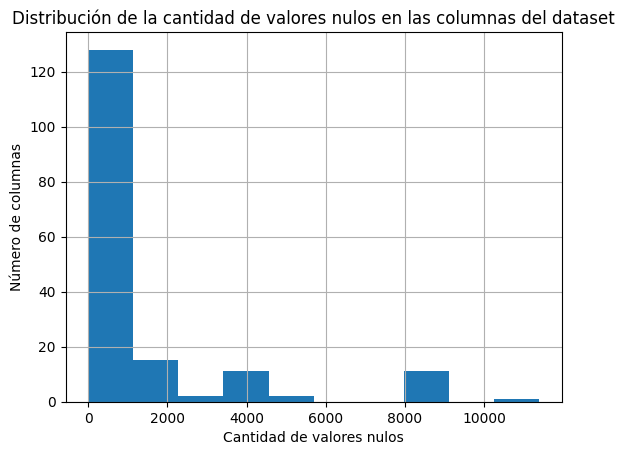

In [21]:
df_hogar.isnull().sum().hist()
plt.title('Distribución de la cantidad de valores nulos en las columnas del dataset')
plt.xlabel('Cantidad de valores nulos')
plt.ylabel('Número de columnas')

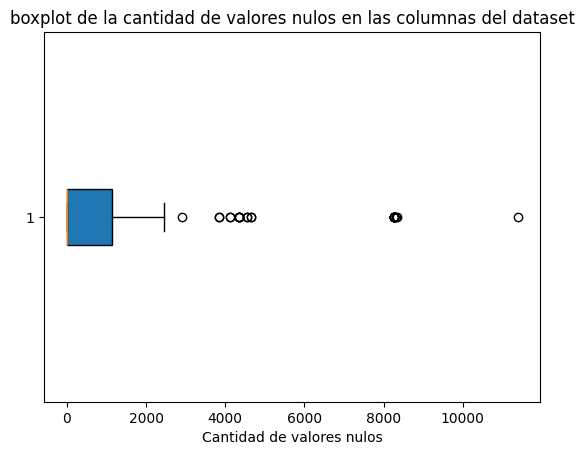

In [22]:
plt.boxplot(df_hogar.isnull().sum(), vert=False, patch_artist=True)
plt.title('boxplot de la cantidad de valores nulos en las columnas del dataset')
plt.xlabel('Cantidad de valores nulos')
plt.show()

Se puede observar que la mayoría de las columnas tienen un número bajo de valores nulos, concentradas cerca de 0 en el eje horizontal. Hay algunas columnas con cantidades moderadas de valores nulos, aunque su número disminuye rápidamente. Además, existen muy pocas columnas con un número elevado de valores nulos, alrededor de 10,000, reflejadas en los extremos del gráfico.

Text(0, 0.5, 'Número de filas')

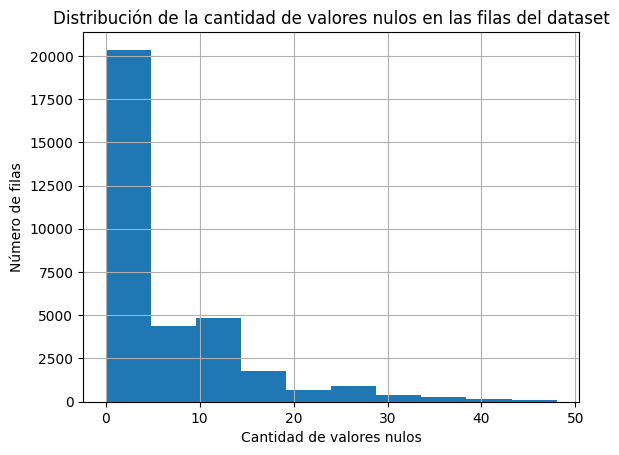

In [23]:
df_hogar.isnull().sum(axis=1).hist()
plt.title('Distribución de la cantidad de valores nulos en las filas del dataset')
plt.xlabel('Cantidad de valores nulos')
plt.ylabel('Número de filas')

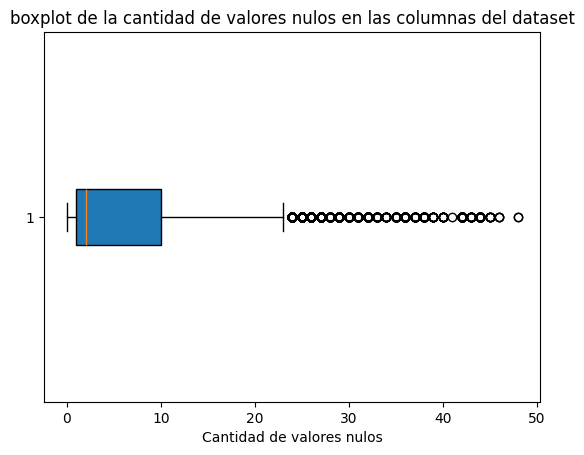

In [24]:
plt.boxplot(df_hogar.isnull().sum(axis=1), vert=False, patch_artist=True)
plt.title('boxplot de la cantidad de valores nulos en las columnas del dataset')
plt.xlabel('Cantidad de valores nulos')
plt.show()

En el gráfico se observa que la mayoría de las filas tienen pocos o ningún valor nulo, concentrándose cerca de 0 en el eje horizontal. Hay un número menor de filas contiene entre 1 y 2 valores nulos, mostrando una disminución significativa y muy pocas filas presentan valores nulos en rangos más altos, como entre 8 y 10 valores nulos, que aparecen como outliers en la distribución.

In [25]:
df_hogar.duplicated().sum()

0

No existen registros duplicados en el dataset.

Todo este procedimiento es replicado para limpiar los datasets restantes.

## Dataset: Gobernabilidad 1

### Características generales

In [26]:
df_gobernabilidad = pd.read_csv('Gobernabilidad.csv', encoding = 'ISO-8859-1')

In [27]:
df_gobernabilidad.shape

(33886, 329)

In [28]:
df_gobernabilidad.dtypes.to_frame().T

AÑO    MES CONGLOME VIVIENDA  HOGAR CODPERSO CODINFOR UBIGEO DOMINIO  \
0  int64  int64    int64    int64  int64    int64    int64  int64   int64   

  ESTRATO  ... P205_01 P206_01 P207_01 P208_01 P209_01 P301_01 TICUEST01B  \
0   int64  ...  object  object  object  object  object  object     object   

  FAMIEGOB07 NCONGLOME SUB_CONGLOME  
0     object     int64        int64  

[1 rows x 329 columns]

### Tratamiento de valores nulos

In [29]:
df_gobernabilidad.replace(to_replace = " ", value = np.nan, inplace=True)

In [30]:
sum(df_gobernabilidad.isnull().sum() > 0)

316

In [31]:
QuitaColumnas(df_gobernabilidad)

In [32]:
df_gobernabilidad.shape

(33886, 105)

De las 329 columnas iniciales, se seleccionaron 105, lo que representa el 31.91% del total de columnas. Esto implica una reducción significativa, manteniendo únicamente aquellas variables consideradas relevantes para el análisis.

In [33]:
df_gobernabilidad = QuitaFilas(df_gobernabilidad)

In [34]:
df_gobernabilidad.shape

(30939, 105)

Se aplicó el mismo proceso utilizando la función quitarfilas, donde de los 33,886 registros iniciales se conservaron 30,939, lo que representa un 91.30% del total de registros.

### Valores nulos en el dataset filtrado

Text(0, 0.5, 'Número de columnas')

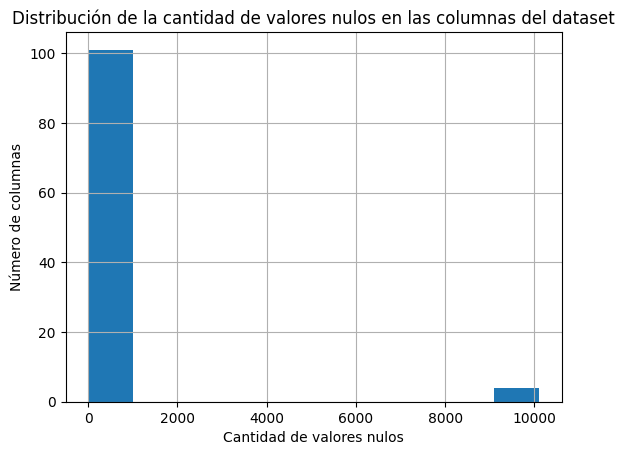

In [35]:
df_gobernabilidad.isnull().sum().hist()
plt.title('Distribución de la cantidad de valores nulos en las columnas del dataset')
plt.xlabel('Cantidad de valores nulos')
plt.ylabel('Número de columnas')

Este gráfico muestra cómo se distribuyen los valores nulos en las columnas del dataset. La mayoría de las columnas tienen una cantidad muy baja o nula de valores faltantes, lo que se refleja en la alta concentración a la izquierda del gráfico. Sin embargo, hay un pequeño número de columnas que presentan valores nulos significativamente más altos, actuando como outliers.

Text(0, 0.5, 'Número de filas')

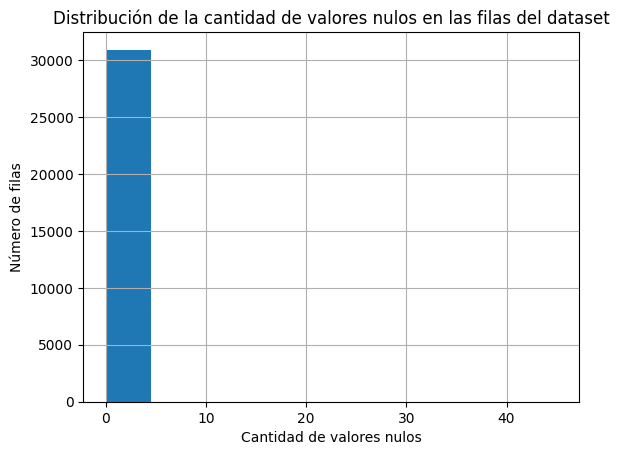

In [36]:
df_gobernabilidad.isnull().sum(axis=1).hist()
plt.title('Distribución de la cantidad de valores nulos en las filas del dataset')
plt.xlabel('Cantidad de valores nulos')
plt.ylabel('Número de filas')

En este gráfico se observa la cantidad de valores nulos en las filas del dataset. La gran mayoría de las filas tienen pocos o ningún valor nulo, concentrándose principalmente en el rango más bajo. Esto indica que la mayoría de los registros están completos o casi completos, con muy pocos casos extremos de filas con valores nulos elevados.

## Dataset: Ingresos

### Características generales

In [37]:
df_empleoIngresos = pd.read_csv('EmpleoIngresos.csv', encoding='ISO-8859-1')

In [38]:
df_empleoIngresos.shape

(86654, 1414)

In [39]:
df_empleoIngresos.dtypes.to_frame().T

AÑO    MES CONGLOME VIVIENDA  HOGAR CODPERSO UBIGEO DOMINIO ESTRATO  \
0  int64  int64    int64    int64  int64    int64  int64   int64   int64   

  CODINFOR  ...  I538E1  I5294B  I5404B   I541A OCU500 OCUPINF EMPLPSEC  \
0    int64  ...  object  object  object  object  int64  object   object   

   FAC500A NCONGLOME SUB_CONGLOME  
0  float64     int64        int64  

[1 rows x 1414 columns]

### Tratamiento de valores nulos

In [40]:
df_empleoIngresos.replace(to_replace = " ", value = np.nan, inplace=True)

In [41]:
sum(df_empleoIngresos.isnull().sum() > 0)

1385

In [42]:
QuitaColumnas(df_empleoIngresos)

In [43]:
df_empleoIngresos.shape

(86654, 235)

In [44]:
df_empleoIngresos = QuitaFilas(df_empleoIngresos)

In [45]:
df_empleoIngresos.shape

(81767, 235)

Con un total inicial de 86,654 registros y 1,414 columnas, el dataset se redujo a 81,767 registros que contienen menos del 50% de valores nulos, y a 235 columnas. Esto representa una conservación del 94.36% de los registros y del 16.62% de las columnas.

### Valores nulos en el dataset filtrado

Text(0, 0.5, 'Número de columnas')

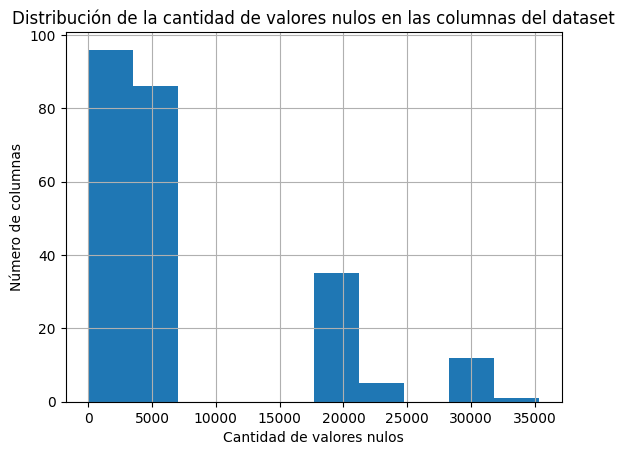

In [46]:
df_empleoIngresos.isnull().sum().hist()
plt.title('Distribución de la cantidad de valores nulos en las columnas del dataset')
plt.xlabel('Cantidad de valores nulos')
plt.ylabel('Número de columnas')

En este gráfico, se presenta la cantidad de valores nulos por columna en el dataset. Se observa que la mayoría de las columnas tienen entre 0 y 5,000 valores nulos, lo que indica una mayor proporción de columnas con pocos valores faltantes. Sin embargo, hay grupos de columnas que tienen un número considerablemente mayor de valores nulos, con algunas alcanzando hasta 35,000, lo que destaca la presencia de outliers.

Text(0, 0.5, 'Número de filas')

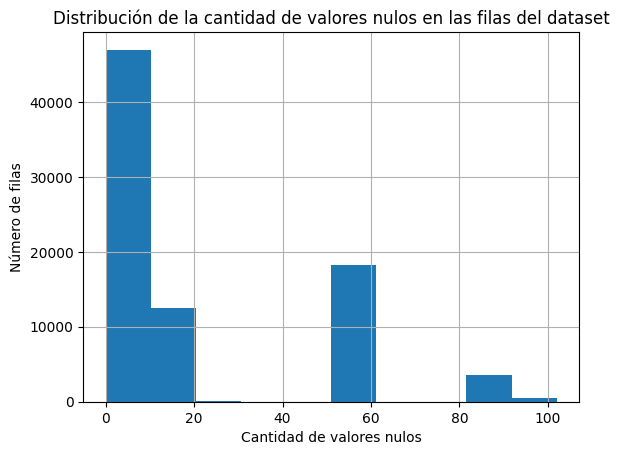

In [47]:
df_empleoIngresos.isnull().sum(axis=1).hist()
plt.title('Distribución de la cantidad de valores nulos en las filas del dataset')
plt.xlabel('Cantidad de valores nulos')
plt.ylabel('Número de filas')

El gráfico muestra la cantidad de valores nulos por fila en el dataset. La mayoría de las filas tienen pocos valores nulos, concentrándose entre 0 y 20 valores faltantes, lo que sugiere que la mayoría de los registros están relativamente completos. Sin embargo, también se observa un número menor de filas con valores nulos significativamente más altos, llegando hasta 100, evidenciando la existencia de algunos registros con información incompleta.

# Selección Preliminar de variables

## Selección en el dataset Hogar

In [48]:
df_hogar.head(5)

AÑO  MES  CONGLOME  VIVIENDA  HOGAR  UBIGEO  DOMINIO  ESTRATO  PERIODO  \
2   2023    2      5007        22     11   10101        4        4        1   
3   2023    2      5007        31     11   10101        4        4        1   
8   2023    8      5027         6     11   10201        7        4        3   
9   2023    8      5027        18     11   10201        7        4        3   
10  2023    8      5027        44     11   10201        7        4        3   

    TIPENC  ...  NBI4  NBI5    FACTOR07 NCONGLOME SUB_CONGLOME CODCCPP  \
2        3  ...     0     0   50.466671      7070            0       1   
3        3  ...     0     0   50.466671      7070            0       1   
8        3  ...     0     0  201.717651      6599            0       1   
9        3  ...     0     0  201.717651      6599            0       1   
10       3  ...     0     0  201.717651      6599            0       1   

                 NOMCCPP   LONGITUD   LATITUD ALTITUD  
2     CIUDAD CHACHAPOYAS -77.873924 -6.229049  2338.0  
3     CIUDAD CHACHAPOYAS -77.873924 -6.229049  2338.0  
8           CIUDAD BAGUA -78.527313 -5.629914   503.0  
9           CIUDAD BAGUA -78.527313 -5.629914   503.0  
10  SECTOR CESAR VALLEJO -78.527313 -5.629914   503.0  

[5 rows x 170 columns]

In [49]:
df_hogar.shape

(33886, 170)

Diccionario ENAHO - Capítulo ENAHO01-2023-100 corresponde a la tabla de significados de las variables correspondientes al dataset hogar.

In [50]:
df_hogar.columns.to_list()

['AÑO',
 'MES',
 'CONGLOME',
 'VIVIENDA',
 'HOGAR',
 'UBIGEO',
 'DOMINIO',
 'ESTRATO',
 'PERIODO',
 'TIPENC',
 'FECENT',
 'RESULT',
 'P22',
 'P24A',
 'P24B',
 'P25$1',
 'P25$2',
 'P25$3',
 'P25$4',
 'P25$5',
 'P101',
 'P102',
 'P103',
 'P103A',
 'P104',
 'P104A',
 'P104B1',
 'P104B2',
 'P105A',
 'P106',
 'P106A',
 'P107B1',
 'P107B2',
 'P107B3',
 'P107B4',
 'P110',
 'P110A1',
 'P110A',
 'P110A_MODIFICADA',
 'P110C',
 'P110C1',
 'P110D',
 'P110E',
 'P110F',
 'P110G',
 'P111A',
 'P1121',
 'P1123',
 'P1124',
 'P1125',
 'P1126',
 'P1127',
 'P112A',
 'P1131',
 'P1132',
 'P1133',
 'P1135',
 'P1136',
 'P1139',
 'P1137',
 'P1138',
 'P113A',
 'P1141',
 'P1142',
 'P1143',
 'P1144',
 'P1145',
 'P114B1',
 'P114B2',
 'P114B3',
 'P1171$01',
 'P1171$02',
 'P1171$04',
 'P1171$05',
 'P1171$06',
 'P1171$07',
 'P1171$08',
 'P1171$09',
 'P1171$10',
 'P1171$11',
 'P1171$12',
 'P1171$13',
 'P1171$14',
 'P1171$15',
 'P1171$16',
 'P1171$17',
 'P1172$01',
 'P1172$02',
 'P1172$04',
 'P1172$12',
 'P1172$14',
 'P

Inspeccionamos las columnas disponibles para trabajar. Mediante el diccionario de la ENAHO, se decidirá según trabajos anteriores y posibles oportunidades de extracción de información relevante.

In [51]:
columnas_hogar = ['AÑO',
 'MES',
 'CONGLOME',
 'VIVIENDA',
 'HOGAR',
 'UBIGEO',
 'DOMINIO',
 'ESTRATO',
 'PERIODO',
 'TIPENC',
 'FECENT','P101','P105A','P106',
 'LONGITUD',
 'LATITUD',
 'ALTITUD']

df_hogar_seleccionado = df_hogar[columnas_hogar]

Identificamos mediante el diccionario aquellos atributos relevantes para el proyecto.

In [52]:
df_hogar_seleccionado

AÑO  MES  CONGLOME  VIVIENDA  HOGAR  UBIGEO  DOMINIO  ESTRATO  \
2      2023    2      5007        22     11   10101        4        4   
3      2023    2      5007        31     11   10101        4        4   
8      2023    8      5027         6     11   10201        7        4   
9      2023    8      5027        18     11   10201        7        4   
10     2023    8      5027        44     11   10201        7        4   
...     ...  ...       ...       ...    ...     ...      ...      ...   
44368  2023    4     21001        24     11  210903        6        8   
44369  2023    4     21001        57     11  210903        6        8   
44372  2023    4     21001        60     11  210903        6        8   
44375  2023    4     21001        63     11  210903        6        8   
44376  2023    4     21001        64     11  210903        6        8   

       PERIODO  TIPENC    FECENT P101 P105A  P106   LONGITUD    LATITUD  \
2            1       3  20230228    1     2  1000 -77.873924  -6.229049   
3            1       3  20230214    1     2  2000 -77.873924  -6.229049   
8            3       3  20230819    4     6   150 -78.527313  -5.629914   
9            3       3  20230821    1     1   NaN -78.527313  -5.629914   
10           3       3  20230904    1     2   465 -78.527313  -5.629914   
...        ...     ...       ...  ...   ...   ...        ...        ...   
44368        4       5  20230423    1     2    25 -69.361732 -15.322027   
44369        4       5  20230508    1     2    20 -69.361732 -15.322027   
44372        4       5  20230421    1     2   NaN -69.361732 -15.322027   
44375        4       5  20230421    1     2   NaN -69.361732 -15.322027   
44376        4       5  20230421    1     2    10 -69.361732 -15.322027   

       ALTITUD  
2       2338.0  
3       2338.0  
8        503.0  
9        503.0  
10       503.0  
...        ...  
44368   3887.0  
44369   3887.0  
44372   3887.0  
44375   3887.0  
44376   3887.0  

[33886 rows x 17 columns]

Este procedimiento se realiza para los demás datasets.

## Selección en el dataset Gobernabilidad

In [53]:
df_gobernabilidad.head(5)

AÑO  MES  CONGLOME  VIVIENDA  HOGAR  CODPERSO  CODINFOR  UBIGEO  DOMINIO  \
0  2023    1      5030         2     11         2         2   10201        7   
1  2023    1      5030        11     11         2         2   10201        7   
2  2023    1      5030        37     11         1         1   10201        7   
3  2023    1      5030        45     11         2         2   10201        7   
4  2023    1      5030        56     11         1         1   10201        7   

   ESTRATO  ...  P204_01 P205_01 P207_01 P208_01 P209_01 P301_01 TICUEST01B  \
0        4  ...        1       2       2      41       1      10          2   
1        4  ...        1       2       2      59       2       5          2   
2        4  ...        1       2       1      30       2       8          2   
3        4  ...        1       2       1      58       6       4          2   
4        4  ...        1       2       2      50       5      10          2   

         FAMIEGOB07 NCONGLOME SUB_CONGLOME  
0  221.406126498219      6618            0  
1  392.181043651068      6618            0  
2  222.170730480144      6618            0  
3  261.454029100712      6618            0  
4  106.680097667035      6618            0  

[5 rows x 105 columns]

In [54]:
df_gobernabilidad.shape

(30939, 105)

Diccionario ENAHO - Capítulo ENAHO01B-2023-1 corresponde a la tabla de significados de las variables correspondientes al dataset gobernabilidad.

In [55]:
df_gobernabilidad.columns

Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'CODPERSO', 'CODINFOR',
       'UBIGEO', 'DOMINIO', 'ESTRATO',
       ...
       'P204_01', 'P205_01', 'P207_01', 'P208_01', 'P209_01', 'P301_01',
       'TICUEST01B', 'FAMIEGOB07', 'NCONGLOME', 'SUB_CONGLOME'],
      dtype='object', length=105)

In [56]:
columnas_gobernabilidad = ['AÑO' ,
 'MES',
 'CONGLOME',
 'VIVIENDA',
 'HOGAR','CODPERSO',
 'CODINFOR',
 'UBIGEO',
 'DOMINIO',
 'ESTRATO', 'P1$01',
 'P1$02',
 'P1$03',
 'P1$04',
 'P1$05',
 'P1$06',
 'P1$07',
 'P1$08',
 'P1$09',
 'P1$10',
 'P1$11',
 'P1$12',
 'P1$13',
 'P1$14',
 'P1$15',
 'P1$16','P1$17','P1$18','P1$19','P1$20','P1$21','P2A1$1','P2A1$2','P2A1$3','P2A1$4']

df_gobernabilidad_seleccionado = df_gobernabilidad[columnas_gobernabilidad]


In [57]:
df_gobernabilidad_seleccionado

AÑO  MES  CONGLOME  VIVIENDA  HOGAR  CODPERSO  CODINFOR  UBIGEO  \
0      2023    1      5030         2     11         2         2   10201   
1      2023    1      5030        11     11         2         2   10201   
2      2023    1      5030        37     11         1         1   10201   
3      2023    1      5030        45     11         2         2   10201   
4      2023    1      5030        56     11         1         1   10201   
...     ...  ...       ...       ...    ...       ...       ...     ...   
33881  2023   12     20670        65     11         1         1   10503   
33882  2023   12     20670        66     11         3         3   10503   
33883  2023   12     20670        67     11         2         2   10503   
33884  2023   12     20670        68     11         1         1   10503   
33885  2023   12     20670        69     11         1         1   10503   

       DOMINIO  ESTRATO  ...  P1$16 P1$17 P1$18 P1$19 P1$20 P1$21 P2A1$1  \
0            7        4  ...      4     2     3     2     3     3      3   
1            7        4  ...      3     1     2     2     2     2      3   
2            7        4  ...      2     3     4     4     4     4      3   
3            7        4  ...      4     5     5     5     5     5      3   
4            7        4  ...      4     2     2     2     4     2      4   
...        ...      ...  ...    ...   ...   ...   ...   ...   ...    ...   
33881        4        8  ...      1     1     1     1     1     1      4   
33882        4        8  ...      2     2     3     3     3     2      3   
33883        4        8  ...      1     1     1     1     1     1      2   
33884        4        8  ...      2     2     2     2     2     1      2   
33885        4        8  ...      3     1     5     5     5     5      5   

      P2A1$2 P2A1$3 P2A1$4  
0          3      5      5  
1          3      4      3  
2          3      3      3  
3          3      3      3  
4          2      2      2  
...      ...    ...    ...  
33881      3      3      2  
33882      5      5      2  
33883      2      1      1  
33884      2      2      2  
33885      5      5      5  

[30939 rows x 35 columns]

## Selección en el dataset Empleo Ingresos

In [58]:
df_empleoIngresos.head(5)

AÑO  MES  CONGLOME  VIVIENDA  HOGAR  CODPERSO  UBIGEO  DOMINIO  ESTRATO  \
0  2023    1      5030         2     11         1   10201        7        4   
1  2023    1      5030         2     11         2   10201        7        4   
2  2023    1      5030        11     11         1   10201        7        4   
3  2023    1      5030        11     11         2   10201        7        4   
4  2023    1      5030        11     11         3   10201        7        4   

   CODINFOR  ...  P209  P301A  TICUEST01A  I513T  OCU500  OCUPINF  EMPLPSEC  \
0         1  ...     1      8           2     28       1        2       NaN   
1         2  ...     1     10           2     78       1        2       NaN   
2         1  ...     2      4           2     84       1        1         1   
3         2  ...     2      5           2     84       1        1         1   
4         3  ...     6      6           2     12       1        1         1   

      FAC500A  NCONGLOME SUB_CONGLOME  
0  165.623856       6618            0  
1  112.328087       6618            0  
2   96.035370       6618            0  
3   86.868881       6618            0  
4  185.492355       6618            0  

[5 rows x 235 columns]

In [59]:
df_empleoIngresos.shape

(81767, 235)

Diccionario ENAHO - Capítulo ENAHO01A-2023-500 corresponde a la tabla de significados de las variables correspondientes al dataset empleoIngresos

In [60]:
df_empleoIngresos.columns.to_list()

['AÑO',
 'MES',
 'CONGLOME',
 'VIVIENDA',
 'HOGAR',
 'CODPERSO',
 'UBIGEO',
 'DOMINIO',
 'ESTRATO',
 'CODINFOR',
 'P500A',
 'P500B',
 'P500B1',
 'P500C',
 'P500D',
 'P500D1',
 'P500N',
 'P500I',
 'P501',
 'P505',
 'P505R4',
 'P505B',
 'P506',
 'P506R4',
 'P507',
 'P510A1',
 'P510B',
 'P5111',
 'P5112',
 'P5113',
 'P5114',
 'P5115',
 'P5116',
 'P5117',
 'P5118',
 'P5119',
 'P51110',
 'P51111',
 'P51112',
 'P512A',
 'P512B',
 'P513',
 'P513A',
 'P513B',
 'P513C',
 'P513D',
 'P513E',
 'P513F',
 'P513G',
 'P513T',
 'P513A1',
 'P513A2',
 'P514',
 'P5151',
 'P5152',
 'P5153',
 'P5154',
 'P5155',
 'P5156',
 'P5157',
 'P5158',
 'P5159',
 'P51510',
 'P51511',
 'P519',
 'P521',
 'P521C',
 'P5561A',
 'P5562A',
 'P5563A',
 'P5563C1',
 'P5563F',
 'P5563G',
 'P5564A',
 'P5565A',
 'P5566A',
 'P5567A',
 'P5568A',
 'P5569A',
 'P55610A',
 'P55611A',
 'P55612A',
 'P55613A',
 'P55614A',
 'P55620A',
 'P55621A',
 'P55622A',
 'P55623A',
 'P55624A',
 'P55625A',
 'P55626A',
 'P55627A',
 'P55628A',
 'P5571A',
 

In [61]:
columnas_empleoIngresos = [
    'AÑO',
 'MES',
 'CONGLOME',
 'VIVIENDA',
 'HOGAR',
 'CODPERSO',
 'UBIGEO',
 'DOMINIO',
 'ESTRATO',
 'CODINFOR',
    'P507',
    'P207',
    'P208A',
    'P301A'
]
df_empleoIngresos_seleccionado = df_empleoIngresos[columnas_empleoIngresos]

In [62]:
df_empleoIngresos_seleccionado

AÑO  MES  CONGLOME  VIVIENDA  HOGAR  CODPERSO  UBIGEO  DOMINIO  \
0      2023    1      5030         2     11         1   10201        7   
1      2023    1      5030         2     11         2   10201        7   
2      2023    1      5030        11     11         1   10201        7   
3      2023    1      5030        11     11         2   10201        7   
4      2023    1      5030        11     11         3   10201        7   
...     ...  ...       ...       ...    ...       ...     ...      ...   
86649  2023   12     20670        67     11         2   10503        4   
86650  2023   12     20670        68     11         1   10503        4   
86651  2023   12     20670        69     11         1   10503        4   
86652  2023   12     20670        69     11         2   10503        4   
86653  2023   12     20670        69     11         3   10503        4   

       ESTRATO  CODINFOR P507  P207  P208A P301A  
0            4         1    4     1     43     8  
1            4         2    2     2     41    10  
2            4         1    2     1     60     4  
3            4         2    5     2     59     5  
4            4         3    2     1     38     6  
...        ...       ...  ...   ...    ...   ...  
86649        8         2    5     2     52     3  
86650        8         1    1     1     24     5  
86651        8         1    2     1     56     3  
86652        8         2    5     2     46     4  
86653        8         3    4     1     24     6  

[81767 rows x 14 columns]

# Preprocesamiento: 2 Unión de datasets

## Indexación de datasets

In [63]:
df_gob_indexado = df_gobernabilidad_seleccionado.set_index(['AÑO', 'MES', 'CONGLOME',
'VIVIENDA','HOGAR','CODPERSO', 'UBIGEO','DOMINIO', 'ESTRATO'])
df_gob_indexado

CODINFOR  \
AÑO  MES CONGLOME VIVIENDA HOGAR CODPERSO UBIGEO DOMINIO ESTRATO             
2023 1   5030     2        11    2        10201  7       4               2   
                  11       11    2        10201  7       4               2   
                  37       11    1        10201  7       4               1   
                  45       11    2        10201  7       4               2   
                  56       11    1        10201  7       4               1   
...                                                                    ...   
     12  20670    65       11    1        10503  4       8               1   
                  66       11    3        10503  4       8               3   
                  67       11    2        10503  4       8               2   
                  68       11    1        10503  4       8               1   
                  69       11    1        10503  4       8               1   

                                                                  P1$01 P1$02  \
AÑO  MES CONGLOME VIVIENDA HOGAR CODPERSO UBIGEO DOMINIO ESTRATO                
2023 1   5030     2        11    2        10201  7       4            2     2   
                  11       11    2        10201  7       4            2     2   
                  37       11    1        10201  7       4            4     4   
                  45       11    2        10201  7       4            1     1   
                  56       11    1        10201  7       4            4     4   
...                                                                 ...   ...   
     12  20670    65       11    1        10503  4       8            1     1   
                  66       11    3        10503  4       8            3     3   
                  67       11    2        10503  4       8            3     3   
                  68       11    1        10503  4       8            2     2   
                  69       11    1        10503  4       8            5     5   

                                                                 P1$03 P1$04  \
AÑO  MES CONGLOME VIVIENDA HOGAR CODPERSO UBIGEO DOMINIO ESTRATO               
2023 1   5030     2        11    2        10201  7       4           3     3   
                  11       11    2        10201  7       4           2     2   
                  37       11    1        10201  7       4           4     2   
                  45       11    2        10201  7       4           1     1   
                  56       11    1        10201  7       4           4     2   
...                                                                ...   ...   
     12  20670    65       11    1        10503  4       8           3     2   
                  66       11    3        10503  4       8           3     2   
                  67       11    2        10503  4       8           3     3   
                  68       11    1        10503  4       8           3     4   
                  69       11    1        10503  4       8           2     3   

                                                                 P1$05 P1$06  \
AÑO  MES CONGLOME VIVIENDA HOGAR CODPERSO UBIGEO DOMINIO ESTRATO               
2023 1   5030     2        11    2        10201  7       4           3     4   
                  11       11    2        10201  7       4           2     2   
                  37       11    1        10201  7       4           2     2   
                  45       11    2        10201  7       4           1     1   
                  56       11    1        10201  7       4           2     1   
...                                                                ...   ...   
     12  20670    65       11    1        10503  4       8           2     1   
                  66       11    3        10503  4       8           3     2   
                  67       11    2        10503  4       8           3     1   
                  68       11    1        10503  4       8           1     2

El indexado se realiza a partir de las primeras columnas de los datastes; estas en conjunto diferencian cada registro. Posteriormente se empleará este índice compuesto para la unión de los datasets.

In [64]:
df_ei_indexado = df_empleoIngresos_seleccionado.set_index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA','HOGAR','CODPERSO', 'UBIGEO','DOMINIO', 'ESTRATO'])
df_ei_indexado

CODINFOR  \
AÑO  MES CONGLOME VIVIENDA HOGAR CODPERSO UBIGEO DOMINIO ESTRATO             
2023 1   5030     2        11    1        10201  7       4               1   
                                 2        10201  7       4               2   
                  11       11    1        10201  7       4               1   
                                 2        10201  7       4               2   
                                 3        10201  7       4               3   
...                                                                    ...   
     12  20670    67       11    2        10503  4       8               2   
                  68       11    1        10503  4       8               1   
                  69       11    1        10503  4       8               1   
                                 2        10503  4       8               2   
                                 3        10503  4       8               3   

                                                                 P507  P207  \
AÑO  MES CONGLOME VIVIENDA HOGAR CODPERSO UBIGEO DOMINIO ESTRATO              
2023 1   5030     2        11    1        10201  7       4          4     1   
                                 2        10201  7       4          2     2   
                  11       11    1        10201  7       4          2     1   
                                 2        10201  7       4          5     2   
                                 3        10201  7       4          2     1   
...                                                               ...   ...   
     12  20670    67       11    2        10503  4       8          5     2   
                  68       11    1        10503  4       8          1     1   
                  69       11    1        10503  4       8          2     1   
                                 2        10503  4       8          5     2   
                                 3        10503  4       8          4     1   

                                                                  P208A P301A  
AÑO  MES CONGLOME VIVIENDA HOGAR CODPERSO UBIGEO DOMINIO ESTRATO               
2023 1   5030     2        11    1        10201  7       4           43     8  
                                 2        10201  7       4           41    10  
                  11       11    1        10201  7       4           60     4  
                                 2        10201  7       4           59     5  
                                 3        10201  7       4           38     6  
...                                                                 ...   ...  
     12  20670    67       11    2        10503  4       8           52     3  
                  68       11    1        10503  4       8           24     5  
                  69       11    1        10503  4       8           56     3  
                                 2        10503  4       8           46     4  
                                 3        10503  4       8           24     6  

[81767 rows x 5 columns]

## Unión de datasets

In [65]:
union_desagregada = pd.concat([df_gob_indexado, df_ei_indexado], axis=1, join='inner')
union_desagregada.reset_index(inplace=True)
for col in ['AÑO', 'MES', 'CONGLOME', 'VIVIENDA','HOGAR','CODPERSO','DOMINIO', 'ESTRATO']:
    del union_desagregada[col]

Se unen los datasets relevantes mediante el índice compuesto. Luego, se eliminan las columnas del índice a excepción del UBIGEO. Este último es requerido para agregar la información a nivel de regiones.

In [66]:
union_desagregada.shape

(30929, 32)

In [67]:
union_desagregada.columns

Index(['UBIGEO', 'CODINFOR', 'P1$01', 'P1$02', 'P1$03', 'P1$04', 'P1$05',
       'P1$06', 'P1$07', 'P1$08', 'P1$09', 'P1$10', 'P1$11', 'P1$12', 'P1$13',
       'P1$14', 'P1$15', 'P1$16', 'P1$17', 'P1$18', 'P1$19', 'P1$20', 'P1$21',
       'P2A1$1', 'P2A1$2', 'P2A1$3', 'P2A1$4', 'CODINFOR', 'P507', 'P207',
       'P208A', 'P301A'],
      dtype='object')

Se dispone entonces de 32 columnas de datos. Nótese que la ENAHO ofrece las bases de datos ya cifradas con códigos numéricos. Por lo que no se requiere de un renombramiento de los valores.

## Dicccionario de Atributos

In [68]:
diccionario = {
 'P1$01': 'Confianza JNE',
 'P1$02': 'Confianza ONPE',
 'P1$03': 'Confianza RENIEC',
 'P1$04': 'Confianza Municipalidad Provincial',
 'P1$05': 'Confianza Municipalidad Distrital',
 'P1$06': 'Confianza PNP',
 'P1$07': 'Confianza FFAA',
 'P1$08': 'Confianza Gobierno Regional',
 'P1$09': 'Confianza Poder Judicial',
 'P1$10': 'Confianza MINEDU',
 'P1$11': 'Confianza Defensoría del Pueblo',
 'P1$12': 'Confianza Congreso',
 'P1$13': 'Confianza Partidos Políticos',
 'P1$14': 'Confianza Prensa Escrita',
 'P1$15': 'Confianza Radio o Televisión',
 'P1$16': 'Confianza Iglesia Católica',
 'P1$17': 'Confianza Procuraduría Anticorrupción',
 'P1$18': 'Confianza Ministerio Público',
 'P1$19': 'Confianza Contraloría',
 'P1$20': 'Confianza SUNAT',
 'P1$21': 'Confianza CANA', # Comisión de Alto Nivel Anticorrupción
 'P2A1$1': 'Gestión Gobierno Central',
 'P2A1$2': 'Gestión Gobierno Regional',
 'P2A1$3': 'Gestión Gobierno Provinicial',
 'P2A1$4': 'Gestión Gobierno Distrital',
 'P507': 'Ocupación Principal',
 'P207': 'Sexo', #página 345 diccionario ENAHO
 'P208A': 'Edad',
 'P301A': 'Nivel Estudios'
}

El diccionario de atributos permite identificar el significado de cada atributo del dataset desagregado. A continuación se presenta el significado de las escalas por atributos.


  **Ocupación Principal:**
1. Empleador o patrono
2. Trabajador Independiente
3. Empleado
4. Obrero
5. Trabajador Familiar No Remunerado
6. Trabajador del Hogar
7. Otro <br>
**Confianza:**
1. Nada
2. Poco
3. Suficiente
4. Bastante
5. NO SABE
9. Missing value <br>
**Gestión:**
1. Muy bueno
2. Bueno
3. Malo
4. Muy malo
5. NO SABE / No responde <br>
**Sexo:**
1. Hombre
2. Mujer <br>
**Nivel Estudios:**
1. Sin Nivel
2. Inicial
3. Primaria Incompleta
4. Primaria Completa
5. Secundaria Incompleta
6. Secundaria Completa
7. Superior No Universitaria Incompleta
8. Superior No Universitaria Completa
9. Superior Universitaria Incompleta
10. Superior Universitaria Completa
11. Maestria/Doctorado
12. Básica especial


# Preprocesamiento 3: Limpieza de unión desagregada

## Características generales

In [69]:
union_desagregada.shape

(30929, 32)

In [70]:
union_desagregada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30929 entries, 0 to 30928
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UBIGEO    30929 non-null  int64 
 1   CODINFOR  30929 non-null  int64 
 2   P1$01     30929 non-null  int64 
 3   P1$02     30929 non-null  object
 4   P1$03     30929 non-null  object
 5   P1$04     30929 non-null  object
 6   P1$05     30929 non-null  object
 7   P1$06     30929 non-null  object
 8   P1$07     30929 non-null  object
 9   P1$08     30929 non-null  object
 10  P1$09     30929 non-null  object
 11  P1$10     30929 non-null  object
 12  P1$11     30928 non-null  object
 13  P1$12     30928 non-null  object
 14  P1$13     30928 non-null  object
 15  P1$14     30928 non-null  object
 16  P1$15     30928 non-null  object
 17  P1$16     30928 non-null  object
 18  P1$17     30928 non-null  object
 19  P1$18     30928 non-null  object
 20  P1$19     30928 non-null  object
 21  P1$20     30

In [71]:
del union_desagregada['CODINFOR']

Eliminamos el atributo codinfor, ya que se trata de un residuo del proceso de indexación visto anteriormente.

In [72]:
union_desagregada.describe()

UBIGEO         P1$01          P207         P208A
count   30929.000000  30929.000000  30929.000000  30929.000000
mean   128633.329917      2.307478      1.563225     47.747583
std     68931.973828      1.373243      0.495994     17.808024
min     10101.000000      1.000000      1.000000     17.000000
25%     70103.000000      1.000000      1.000000     33.000000
50%    130608.000000      2.000000      2.000000     46.000000
75%    180302.000000      3.000000      2.000000     61.000000
max    250401.000000      5.000000      2.000000     98.000000

Se observa que los datos no son realmente numéricos sino cadenas de texto que representan números. Se procede primero a Identificar los valores nulos por columna, imputar datos y finalmente modificar los datos a un tipo adecuado.

## Tratamiento de valores nulos

In [73]:
##Cantidad de nulos en procentaje para una mejor visualización:
nulos = union_desagregada.isna().sum()
pt = ((union_desagregada.isna().sum())/union_desagregada.shape[0])*100
dic = {'columnas':union_desagregada.columns,'nulos':nulos,'porcentaje':pt}
x= pd.DataFrame(dic)
x.sort_values(by='porcentaje',ascending=False)

columnas  nulos  porcentaje
P507       P507   6048   19.554463
P301A     P301A      5    0.016166
P2A1$4   P2A1$4      2    0.006466
P2A1$3   P2A1$3      2    0.006466
P2A1$2   P2A1$2      2    0.006466
P2A1$1   P2A1$1      2    0.006466
P1$14     P1$14      1    0.003233
P1$21     P1$21      1    0.003233
P1$20     P1$20      1    0.003233
P1$19     P1$19      1    0.003233
P1$18     P1$18      1    0.003233
P1$17     P1$17      1    0.003233
P1$16     P1$16      1    0.003233
P1$15     P1$15      1    0.003233
P1$13     P1$13      1    0.003233
P1$12     P1$12      1    0.003233
P1$11     P1$11      1    0.003233
P1$01     P1$01      0    0.000000
P1$10     P1$10      0    0.000000
P1$09     P1$09      0    0.000000
P1$08     P1$08      0    0.000000
P1$07     P1$07      0    0.000000
P1$06     P1$06      0    0.000000
P1$05     P1$05      0    0.000000
P1$04     P1$04      0    0.000000
P1$03     P1$03      0    0.000000
P1$02     P1$02      0    0.000000
P207       P207      0    0.000000
P208A     P208A      0    0.000000
UBIGEO   UBIGEO      0    0.000000

El atributo P507, que corresponde a la ocupación de la persona, es el que tiene mayor porcentaje de valores nulos. Dado que del contexto se sabe que esta variable indica el tipo de trabajo, se asume que los registros nulos corresponden a personas que no trabajan. Luego, definimos una nueva categoría para estos registros.

In [74]:
union_desagregada.loc[union_desagregada['P507'].isnull(), 'P507'] = '8'

Se usará la cadena '8' para identificar a los valores nulos como no trabajadores.

In [75]:
sum(union_desagregada.isnull().sum(axis=1) > 0)/union_desagregada.shape[0]*100

0.022632480843221572

Se observa que el restante de registros con valores nulos es ínfimo (0.023 %). Por lo tanto, se decide eliminar aquellos registros.

In [76]:
union_desagregada_ = union_desagregada.dropna()
nulos = union_desagregada_.isna().sum()
pt = ((union_desagregada_.isna().sum())/union_desagregada_.shape[0])*100
dic = {'columnas':union_desagregada_.columns,'nulos':nulos,'porcentaje':pt}
x= pd.DataFrame(dic)
x.sort_values(by='porcentaje',ascending=False)

columnas  nulos  porcentaje
UBIGEO   UBIGEO      0         0.0
P1$01     P1$01      0         0.0
P208A     P208A      0         0.0
P207       P207      0         0.0
P507       P507      0         0.0
P2A1$4   P2A1$4      0         0.0
P2A1$3   P2A1$3      0         0.0
P2A1$2   P2A1$2      0         0.0
P2A1$1   P2A1$1      0         0.0
P1$21     P1$21      0         0.0
P1$20     P1$20      0         0.0
P1$19     P1$19      0         0.0
P1$18     P1$18      0         0.0
P1$17     P1$17      0         0.0
P1$16     P1$16      0         0.0
P1$15     P1$15      0         0.0
P1$14     P1$14      0         0.0
P1$13     P1$13      0         0.0
P1$12     P1$12      0         0.0
P1$11     P1$11      0         0.0
P1$10     P1$10      0         0.0
P1$09     P1$09      0         0.0
P1$08     P1$08      0         0.0
P1$07     P1$07      0         0.0
P1$06     P1$06      0         0.0
P1$05     P1$05      0         0.0
P1$04     P1$04      0         0.0
P1$03     P1$03      0         0.0
P1$02     P1$02      0         0.0
P301A     P301A      0         0.0

## Valores duplicados

In [77]:
union_desagregada_.duplicated().sum()

1

se identificó un valor duplicado. Este será retirado del dataset.

In [78]:
union_desagregada_.drop_duplicates(inplace=True)

In [79]:
union_desagregada_.duplicated().sum()

0

## Modificación de Tipos de datos

In [80]:
UD_types = union_desagregada_.copy()

In [81]:
for col in UD_types.columns:
    UD_types[col] = UD_types[col].astype(int)

Los tipos de datos generalmente son cadenas de texto; por lo tanto, se procede a cambiar dichos valores a un tipo de dato numérico.

In [82]:
UD_types.dtypes

UBIGEO    int32
P1$01     int32
P1$02     int32
P1$03     int32
P1$04     int32
P1$05     int32
P1$06     int32
P1$07     int32
P1$08     int32
P1$09     int32
P1$10     int32
P1$11     int32
P1$12     int32
P1$13     int32
P1$14     int32
P1$15     int32
P1$16     int32
P1$17     int32
P1$18     int32
P1$19     int32
P1$20     int32
P1$21     int32
P2A1$1    int32
P2A1$2    int32
P2A1$3    int32
P2A1$4    int32
P507      int32
P207      int32
P208A     int32
P301A     int32
dtype: object

## Reubicación de valores de confianza y opinión sobre gestión

In [83]:
UD_types.columns

Index(['UBIGEO', 'P1$01', 'P1$02', 'P1$03', 'P1$04', 'P1$05', 'P1$06', 'P1$07',
       'P1$08', 'P1$09', 'P1$10', 'P1$11', 'P1$12', 'P1$13', 'P1$14', 'P1$15',
       'P1$16', 'P1$17', 'P1$18', 'P1$19', 'P1$20', 'P1$21', 'P2A1$1',
       'P2A1$2', 'P2A1$3', 'P2A1$4', 'P507', 'P207', 'P208A', 'P301A'],
      dtype='object')

In [84]:
confianzas = [ 'P1$01', 'P1$02', 'P1$03', 'P1$04', 'P1$05', 'P1$06', 'P1$07',
       'P1$08', 'P1$09', 'P1$10', 'P1$11', 'P1$12', 'P1$13', 'P1$14', 'P1$15',
       'P1$16', 'P1$17', 'P1$18', 'P1$19', 'P1$20', 'P1$21']
for col in confianzas:
    UD_types.loc[UD_types[col] == 5, col] = 2.5

Ubicamos a todos los que no saben o no concen en una posición intermedia entre la confianza máxima y la desconfianza.

In [85]:
gestiones = ['P2A1$1',
       'P2A1$2', 'P2A1$3', 'P2A1$4']
for col in confianzas:
    UD_types.loc[UD_types[col] == 5, col] = 2.5

Realizamos el mismo procedimiento para la opinión sobre la gestión.

## Agregación de regiones

In [86]:
def region(x):
    return x[:-4]
UD_types['Region'] = UD_types['UBIGEO'].astype(str).apply(region)

El ubigeo es un código que permite representar localizaciones a partir de dos cifras por tipo y subtipos de ubicaciones geográficas. En este caso, nos interesa las categorías de Regiones. Por lo tanto, la función 'region' nos permite identificar los primeros dígitos del ubigeo.

In [87]:
regiones = ['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO',
           'CAJAMARCA', 'CALLAO', 'CUSCO', 'HUANCAVELICA', 'HUANUCO',
            'ICA','JUNIN','LA LIBERTAD','LAMBAYEQUE','LIMA',
            'LORETO','MADRE DE DIOS', 'MOQUEGUA', 'PASCO', 'PIURA',
            'PUNO','SAN MARTIN', 'TACNA', 'TUMBES','UCAYALI']

In [88]:
def region_nombre(x):
    return regiones[x-1]
UD_types['REGION'] = UD_types['Region'].astype(int).apply(region_nombre)

In [89]:
UD_types.sample(10)

UBIGEO  P1$01  P1$02  P1$03  P1$04  P1$05  P1$06  P1$07  P1$08  P1$09  \
17452  170201    2.0    2.0    3.0    3.0    3.0    3.0    3.0    3.0    3.0   
1924   160701    2.5    2.5    4.0    4.0    4.0    2.5    2.5    2.5    2.5   
29046   61305    2.5    2.5    2.5    2.5    2.5    2.0    1.0    2.5    2.5   
25089  170101    1.0    1.0    1.0    1.0    1.0    2.0    2.0    1.0    2.0   
23893   60410    2.0    2.0    2.0    1.0    1.0    2.0    2.0    2.0    1.0   
5976    60401    2.0    2.5    2.0    2.0    2.5    2.5    2.5    3.0    2.5   
15121  211101    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
24460  120302    2.5    2.5    2.0    1.0    1.0    1.0    1.0    2.5    2.5   
26653   80105    1.0    1.0    1.0    2.0    2.0    1.0    1.0    2.0    1.0   
16275   60109    2.5    2.5    3.0    2.5    3.0    2.0    3.0    2.5    3.0   

       ...  P2A1$1  P2A1$2  P2A1$3  P2A1$4  P507  P207  P208A  P301A  Region  \
17452  ...       3       2       2       2     4     2     57      4      17   
1924   ...       5       5       5       5     5     2     34      5      16   
29046  ...       2       3       3       5     5     2     78      1       6   
25089  ...       4       3       3       3     2     1     43      9      17   
23893  ...       3       3       3       3     5     1     23      9       6   
5976   ...       5       5       5       5     2     2     43      6       6   
15121  ...       3       3       4       4     2     2     53      3      21   
24460  ...       4       4       4       5     2     2     49      4      12   
26653  ...       3       3       4       3     3     2     60     10       8   
16275  ...       5       5       5       2     8     1     91      3       6   

              REGION  
17452  MADRE DE DIOS  
1924          LORETO  
29046      CAJAMARCA  
25089  MADRE DE DIOS  
23893      CAJAMARCA  
5976       CAJAMARCA  
15121           PUNO  
24460          JUNIN  
26653          CUSCO  
16275      CAJAMARCA  

[10 rows x 32 columns]

Los primeros dígitos del ubigeo determinan la región en orden alfabético. A la región Amazonas le corresponde el valor 01, y así sucesivamente hasta la región Ucayali con el valor 25.

## Exportación de unión de datos desagregados

In [90]:
UD_types.to_csv('union_desagregada_limpia.csv')

Los datos finales son exportados para su uso en la fase de exploración de la data.

# Preprocesamiento 4: Unión agregada.

In [91]:
union_desagregada = pd.read_csv('union_desagregada_limpia.csv')

In [92]:
union_agregada = union_desagregada.groupby(['REGION'])[confianzas].mean().reset_index()

Agregamos los datos de los encuestados por región. De ese modo, se podrán conectar con las otras bases de datos.

In [93]:
df_hogar_seleccionado.columns

Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 'DOMINIO',
       'ESTRATO', 'PERIODO', 'TIPENC', 'FECENT', 'P101', 'P105A', 'P106',
       'LONGITUD', 'LATITUD', 'ALTITUD'],
      dtype='object')

Significado de las variables:

P101 : Tipo de vivienda
1.Casa independiente
2.Departamento en edificio
3.Vivienda en quinta
4.Vivienda en casa de vecindad (Callejón, solar o corralón)
5.Choza o cabaña
6.Vivienda improvisada
7.Local no destinado para habitación humana
8.Otro
P105A: Propiedad de vivienda
1.Alquilada
2.Propia, totalmente pagada
3.Propia, por invasión
4.Propia, comprándola a plazos
5.Cedida por el centro de trabajo
6.Cedida por otro hogar o institución
7.Otra forma
P106: Precio estimado de vivienda

In [94]:
df_hogar_seleccionado['Region'] = df_hogar_seleccionado['UBIGEO'].astype(str).apply(region)
df_hogar_seleccionado['REGION'] = df_hogar_seleccionado['Region'].astype(int).apply(region_nombre)

Creamos una columna de regiones a partir de las funciones creadas anteriormente para esta tarea.

In [95]:
df_hogar_seleccionado.dropna(inplace=True)

In [96]:
df_hogar_seleccionado['P106'] = df_hogar_seleccionado['P106'].astype(int)

In [97]:
df_hogar_seleccionado = df_hogar_seleccionado.groupby('REGION')['P106'].mean().to_frame()

Preprocesamos brevemente los datos de hogar y seleccionamos la variable precio de vivienda, pues es la única que puede agregarse mediante un promedio simple por región.

In [98]:
Salarios = pd.read_excel('Salario_Promedio.xlsx')
Salarios['REGION'] = Salarios['REGION'].str.upper()


In [99]:
Salarios.head()

REGION        2007        2008         2009         2010         2011  \
0  AMAZONAS  542.308413  641.859815   718.659267   806.249353   784.123836   
1    ANCASH  623.790490  734.015605   770.800117   869.633862   941.063860   
2  APURIMAC  432.206244  490.076908   519.208515   634.021772   598.236280   
3  AREQUIPA  816.537585  985.651101  1051.047670  1120.376542  1257.767070   
4  AYACUCHO  475.877794  517.702509   576.730174   644.701607   747.944753   

          2012         2013         2014         2015         2016  \
0   858.836796   826.148151   857.259270   939.064813   995.398673   
1   973.535171  1009.078910  1048.672724  1014.398772  1094.851826   
2   620.002901   778.168584   841.620186   925.563480   889.366492   
3  1299.690818  1377.250185  1428.993379  1456.911435  1512.244693   
4   750.214528   752.233867   773.457265   904.603519   879.509476   

          2017         2018         2019         2020         2021  \
0   967.106798  1033.197260  1013.962558   992.895413  1180.673567   
1  1090.038934  1117.017900  1230.936972  1057.212206  1147.659659   
2   900.813685   936.852997  1123.750056  1004.480868  1104.793097   
3  1545.024687  1644.645099  1703.062294  1530.315818  1542.851170   
4   902.226844   959.824956   970.649188  1095.425114  1005.635969   

          2022         2023  
0  1125.304947  1240.359430  
1  1286.512384  1427.451364  
2  1201.118297  1283.954130  
3  1923.898739  1994.916486  
4  1222.042577  1228.546417

Cargamos los datos salariales promedio por región.

In [100]:
union_agregada = pd.concat([Salarios[['REGION', '2023']].set_index('REGION'),df_hogar_seleccionado, union_agregada.set_index('REGION') ], axis=1)

In [101]:
union_agregada.head()

2023        P106     P1$01     P1$02     P1$03     P1$04  \
REGION                                                                      
AMAZONAS  1240.359430  162.690311  2.084202  2.131917  2.618284  2.069366   
ANCASH    1427.451364  248.429535  1.881740  1.905823  2.442128  1.751618   
APURIMAC  1283.954130  141.640995  2.114709  2.162459  2.678375  2.070801   
AREQUIPA  1994.916486  410.234435  1.828137  1.892486  2.437250  1.728217   
AYACUCHO  1228.546417  166.431262  2.063700  2.098168  2.494764  1.908813   

             P1$05     P1$06     P1$07     P1$08  ...     P1$12     P1$13  \
REGION                                            ...                       
AMAZONAS  2.087009  2.121492  2.303929  2.000000  ...  1.505213  1.461107   
ANCASH    1.771747  1.878145  2.040618  1.692308  ...  1.441409  1.379583   
APURIMAC  2.007684  1.836443  1.892426  2.009879  ...  1.446762  1.482437   
AREQUIPA  1.801359  1.760991  1.985212  1.621503  ...  1.269784  1.270983   
AYACUCHO  1.904887  1.802792  1.907941  1.957243  ...  1.600349  1.537958   

             P1$14     P1$15     P1$16     P1$17     P1$18     P1$19  \
REGION                                                                 
AMAZONAS  1.821973  2.034884  2.502406  2.094226  2.090617  2.161588   
ANCASH    1.663911  1.780014  2.273185  1.814522  1.821711  1.897196   
APURIMAC  1.766191  1.985730  2.786498  2.054885  2.055982  2.088364   
AREQUIPA  1.527578  1.699041  2.258993  1.693046  1.697442  1.766587   
AYACUCHO  1.810646  1.932373  2.282286  2.054101  2.078970  2.152269   

             P1$20     P1$21  
REGION                        
AMAZONAS  2.176022  2.135525  
ANCASH    1.990654  1.876348  
APURIMAC  2.115807  2.049945  
AREQUIPA  1.815747  1.714628  
AYACUCHO  2.184991  2.129581  

[5 rows x 23 columns]

Unimos los datos usando como índide la región. Así, se obtendrá la data agregada para su posterior análisis.

## Exportación de la unión de datos agregados

In [102]:
union_agregada.reset_index().to_csv('union_agregada.csv')

# Preprocesamiento 6: Outliers con Pyod

In [103]:
union_agregada = pd.read_csv('union_agregada.csv', index_col=0)
union_desagregada = pd.read_csv('union_desagregada_limpia.csv',index_col=0)

In [104]:
diccionario = {
 'P106': 'Alquiler mensual',
 'P1$01': 'Confianza JNE',
 'P1$02': 'Confianza ONPE',
 'P1$03': 'Confianza RENIEC',
 'P1$04': 'Confianza Municipalidad Provincial',
 'P1$05': 'Confianza Municipalidad Distrital',
 'P1$06': 'Confianza PNP',
 'P1$07': 'Confianza FFAA',
 'P1$08': 'Confianza Gobierno Regional',
 'P1$09': 'Confianza Poder Judicial',
 'P1$10': 'Confianza MINEDU',
 'P1$11': 'Confianza Defensoría del Pueblo',
 'P1$12': 'Confianza Congreso',
 'P1$13': 'Confianza Partidos Políticos',
 'P1$14': 'Confianza Prensa Escrita',
 'P1$15': 'Confianza Radio o Televisión',
 'P1$16': 'Confianza Iglesia Católica',
 'P1$17': 'Confianza Procuraduría Anticorrupción',
 'P1$18': 'Confianza Ministerio Público',
 'P1$19': 'Confianza Contraloría',
 'P1$20': 'Confianza SUNAT',
 'P1$21': 'Confianza CANA', # Comisión de Alto Nivel Anticorrupción
 'P2A1$1': 'Gestión Gobierno Central',
 'P2A1$2': 'Gestión Gobierno Regional',
 'P2A1$3': 'Gestión Gobierno Provinicial',
 'P2A1$4': 'Gestión Gobierno Distrital',
 'P507': 'Ocupación Principal',
 'P207': 'Sexo', #página 345 diccionario ENAHO
 'P208A': 'Edad',
 'P301A': 'Nivel Estudios'
}

In [105]:
union_desagregada.rename(columns=diccionario, inplace=True)
union_agregada.rename(columns=diccionario, inplace=True)

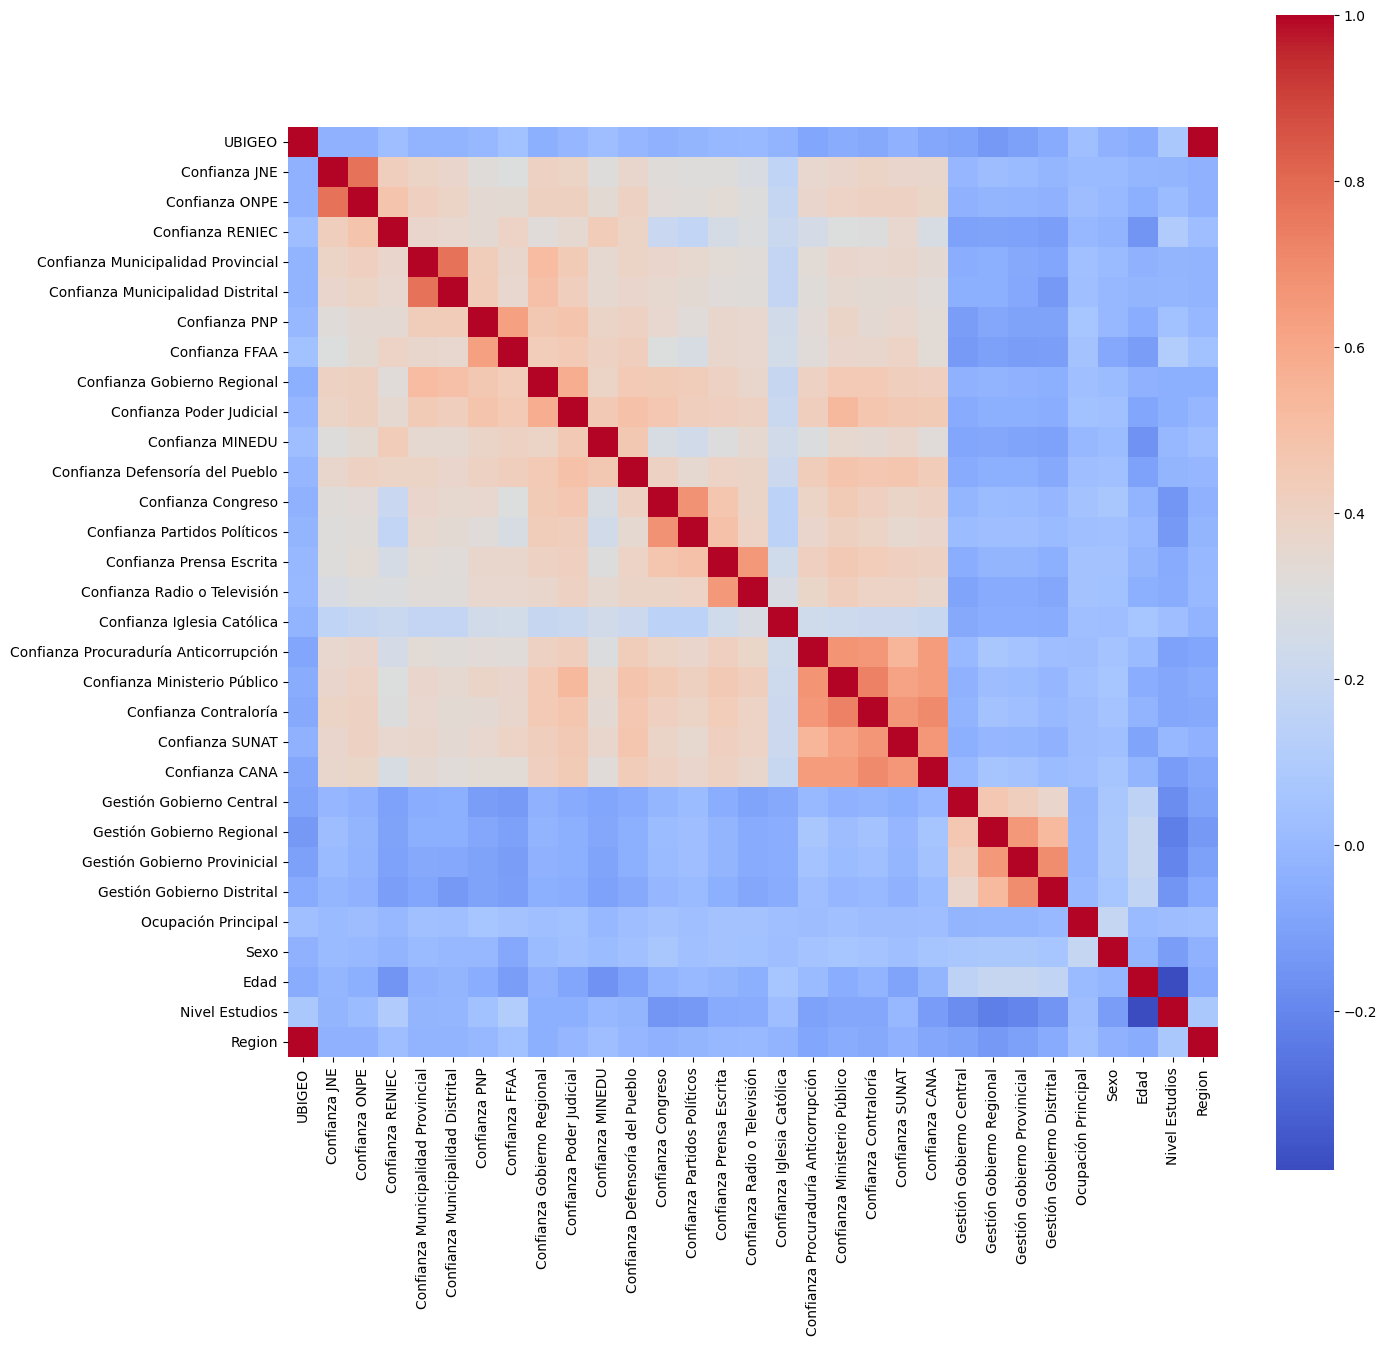

In [106]:
df_corr = union_desagregada.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=False, cmap='coolwarm', square=True, xticklabels=True, yticklabels=True)
plt.show()

En este grafico se puede observar que una de las correlaciones más fuertes se observa entre la confianza en la ONPE y la confianza en RENIEC, esto puede explicarse porque ambas instituciones están estrechamente relacionadas con los procesos electorales en Perú. La confianza en la transparencia y legitimidad del sistema electoral tiende a extenderse a ambas, ya que operan de manera coordinada en la organización de elecciones. De manera similar, hay una fuerte correlación entre la confianza en los gobiernos regionales y distritales. Esto puede deberse a que ambas instituciones comparten funciones complementarias en la gestión de políticas públicas a nivel local, influyendo en la percepción de los ciudadanos sobre su eficacia conjunta.

Otro patrón interesante es la relación entre la confianza en el Ministerio de Educación y la confianza en la prensa escrita, que presentan una correlación moderada. Esto podría estar relacionado con el hecho de que las personas más interesadas en temas educativos suelen consumir información más analítica y confiable, como la que proporcionan medios de comunicación serios, aumentando su confianza en estas fuentes. También destaca la correlación entre la edad de los encuestados y la confianza en la Iglesia Católica. Es común que las personas mayores, debido a valores tradicionales y culturales, mantengan una mayor afinidad y respeto hacia instituciones religiosas como la Iglesia Católica, lo que podría explicar esta relación.

La confianza en el Congreso y los partidos políticos también está correlacionada, ya que ambas instituciones están intrínsecamente ligadas al sistema político del país. Las percepciones sobre el Congreso suelen extenderse a los partidos políticos debido a su protagonismo en la formación de gobierno y toma de decisiones legislativas. Por otro lado, hay una conexión positiva entre la percepción de la gestión del Gobierno Central y la gestión de los gobiernos regionales. Esto probablemente ocurre porque los ciudadanos tienden a evaluar estas entidades como partes complementarias de un mismo sistema de administración pública, donde el desempeño de una puede influir en la percepción de la otra.

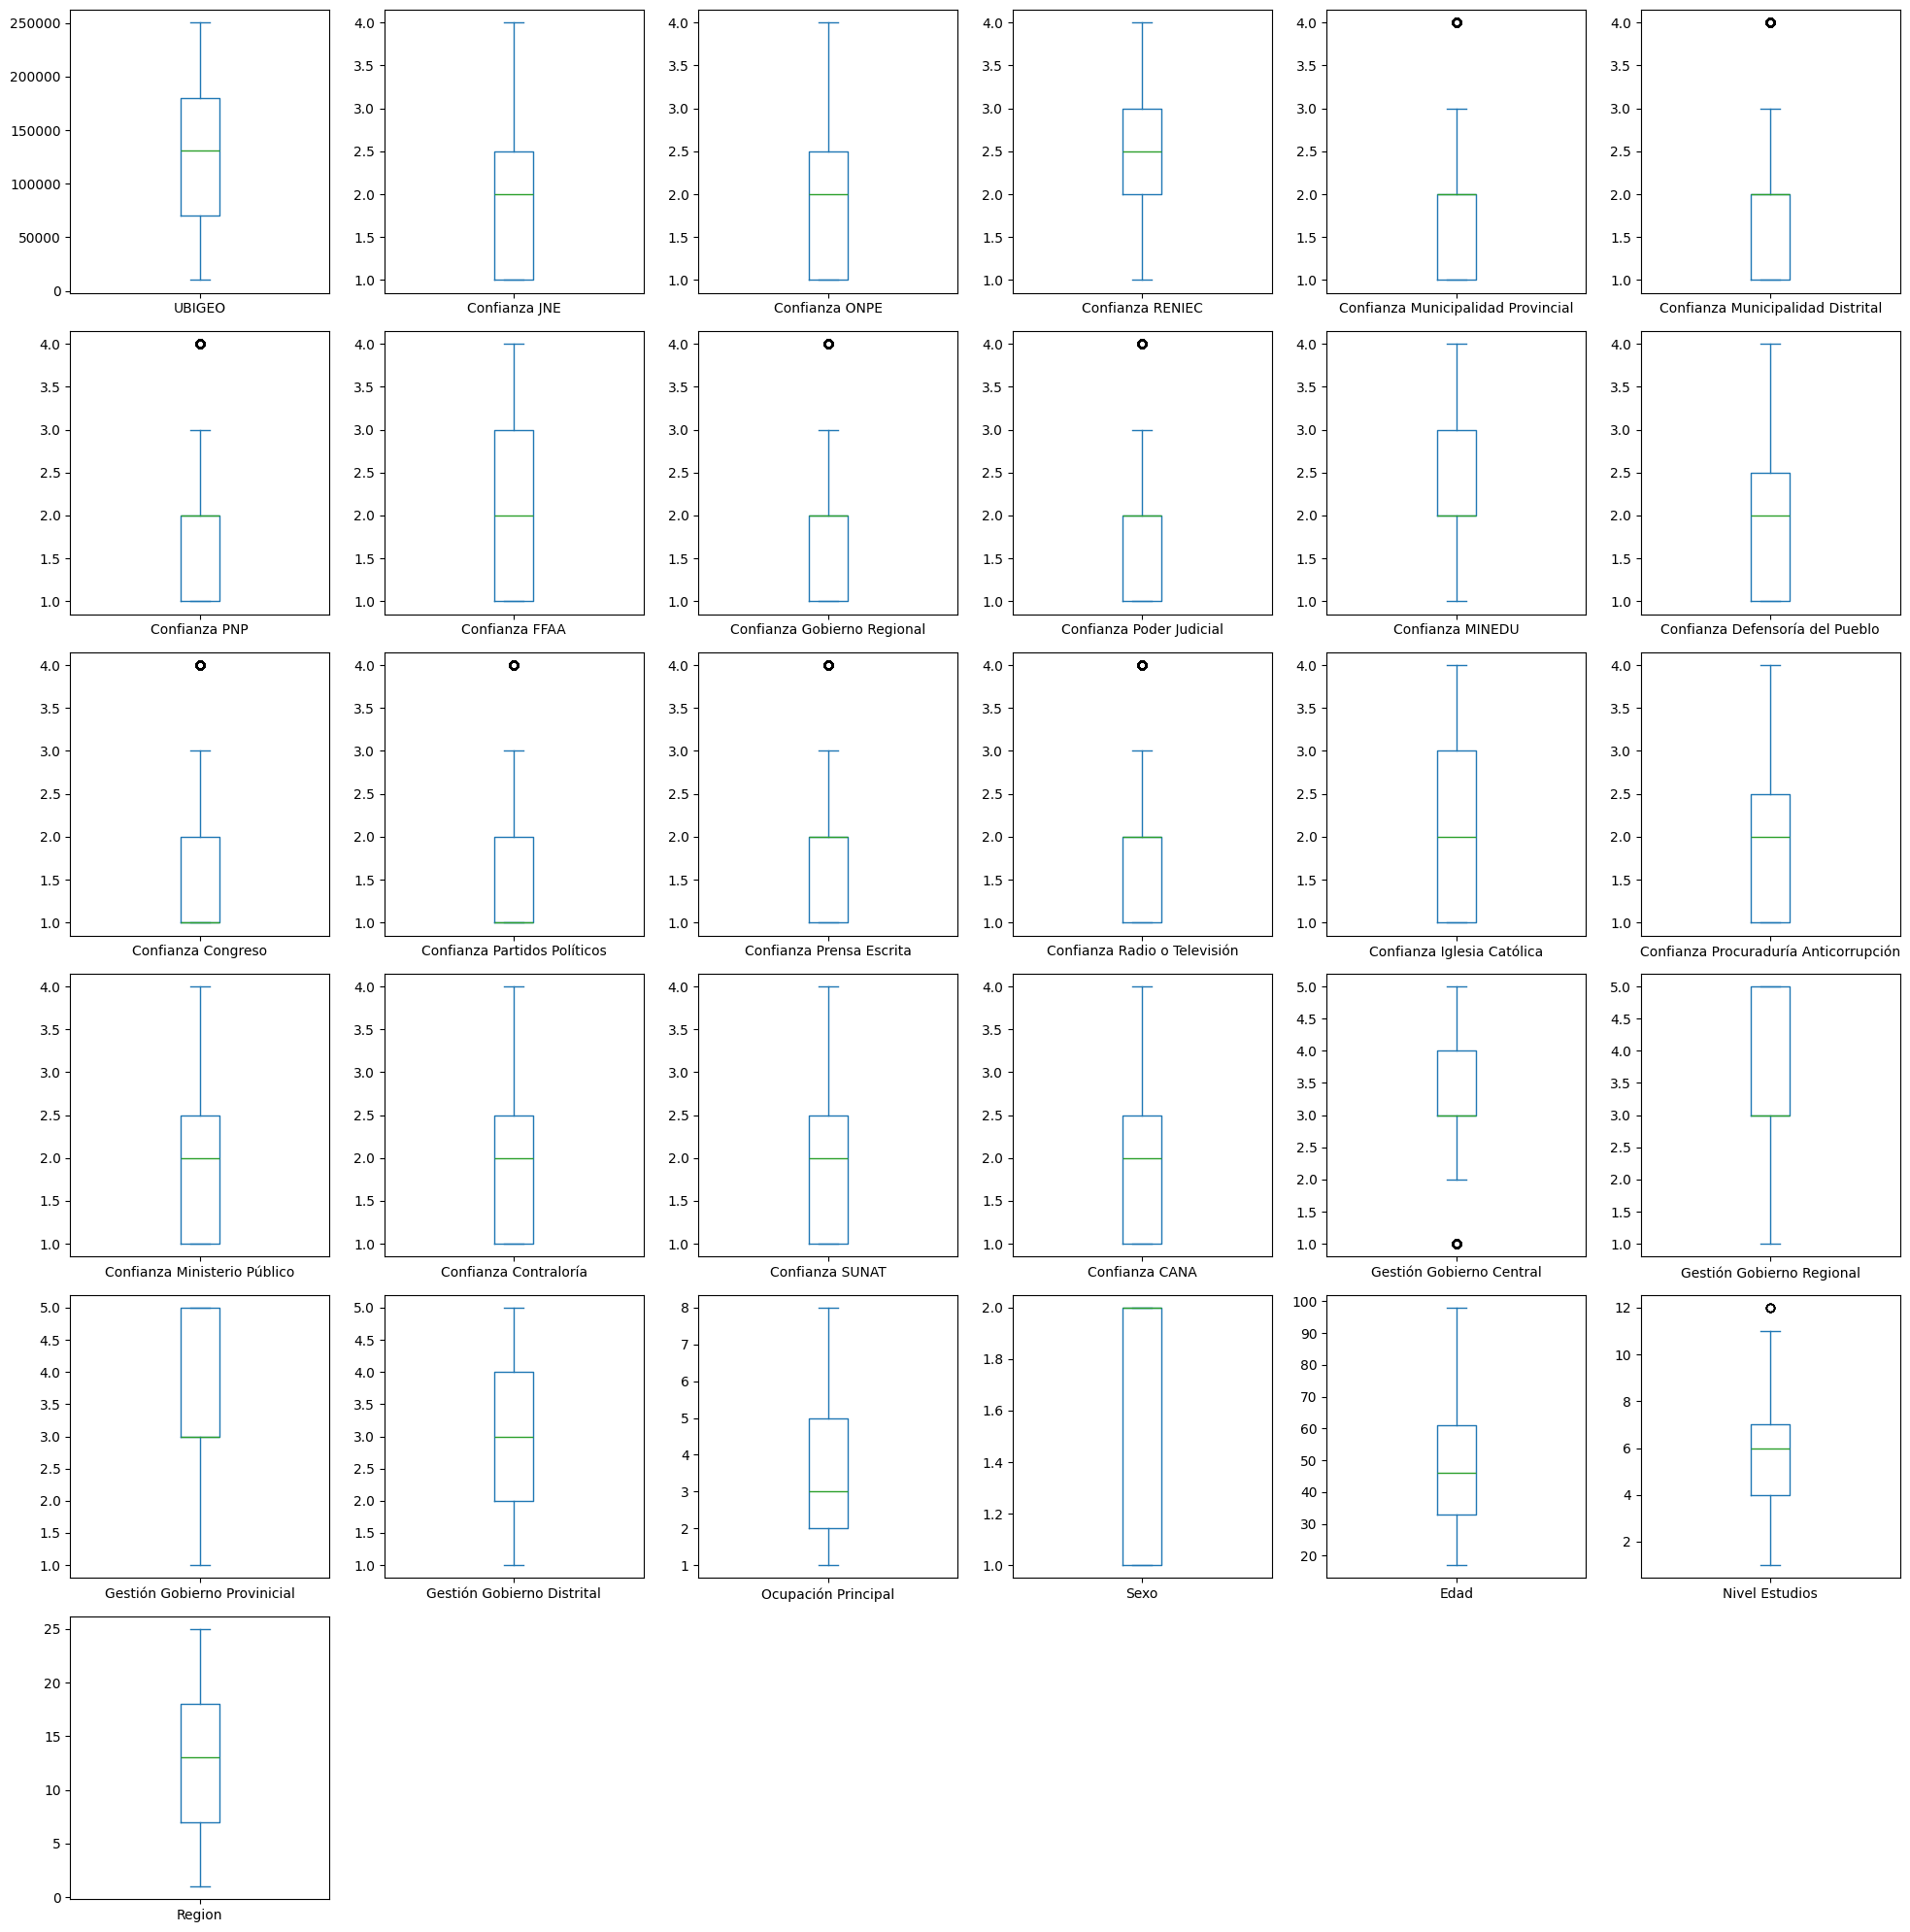

In [107]:
union_desagregada_num = union_desagregada.select_dtypes(include=[np.number])
union_desagregada_num.plot(kind='box', layout=(6,6), subplots=True, figsize=(20, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [108]:
contamination = [0.02, 0.05, 0.1, 0.2, 0.3]
d = []
for cont in contamination:
    clf = IForest(contamination=cont)
    clf.fit(union_desagregada_num)
    y_pred =clf.predict(union_desagregada_num)
    indices = union_desagregada_num[y_pred==1].index
    tamaño = len(indices)
    pt = (tamaño/union_desagregada_num.shape[0])*100
    d.append({'contaminacion':cont,'cantidad_dectectada':tamaño,'procentaje':pt})
x = pd.DataFrame(d)
x

contaminacion  cantidad_dectectada  procentaje
0           0.02                  619    2.001876
1           0.05                 1546    4.999838
2           0.10                 3092    9.999677
3           0.20                 6184   19.999353
4           0.30                 9276   29.999030

Como el tamaño de la dataset es de 30921 se opta por una limpieza de outlers de 0.1 ya que es un punto intermedio que podría balancear entre identificar una cantidad razonable de anomalías sin incluir demasiados casos normales como falsos positivos.

In [109]:
clf = IForest(contamination=0.1)
clf.fit(union_desagregada_num)
y_pred =clf.predict(union_desagregada_num)
indices = union_desagregada_num[y_pred==1].index
df_estudiante = union_desagregada_num.drop(indices)

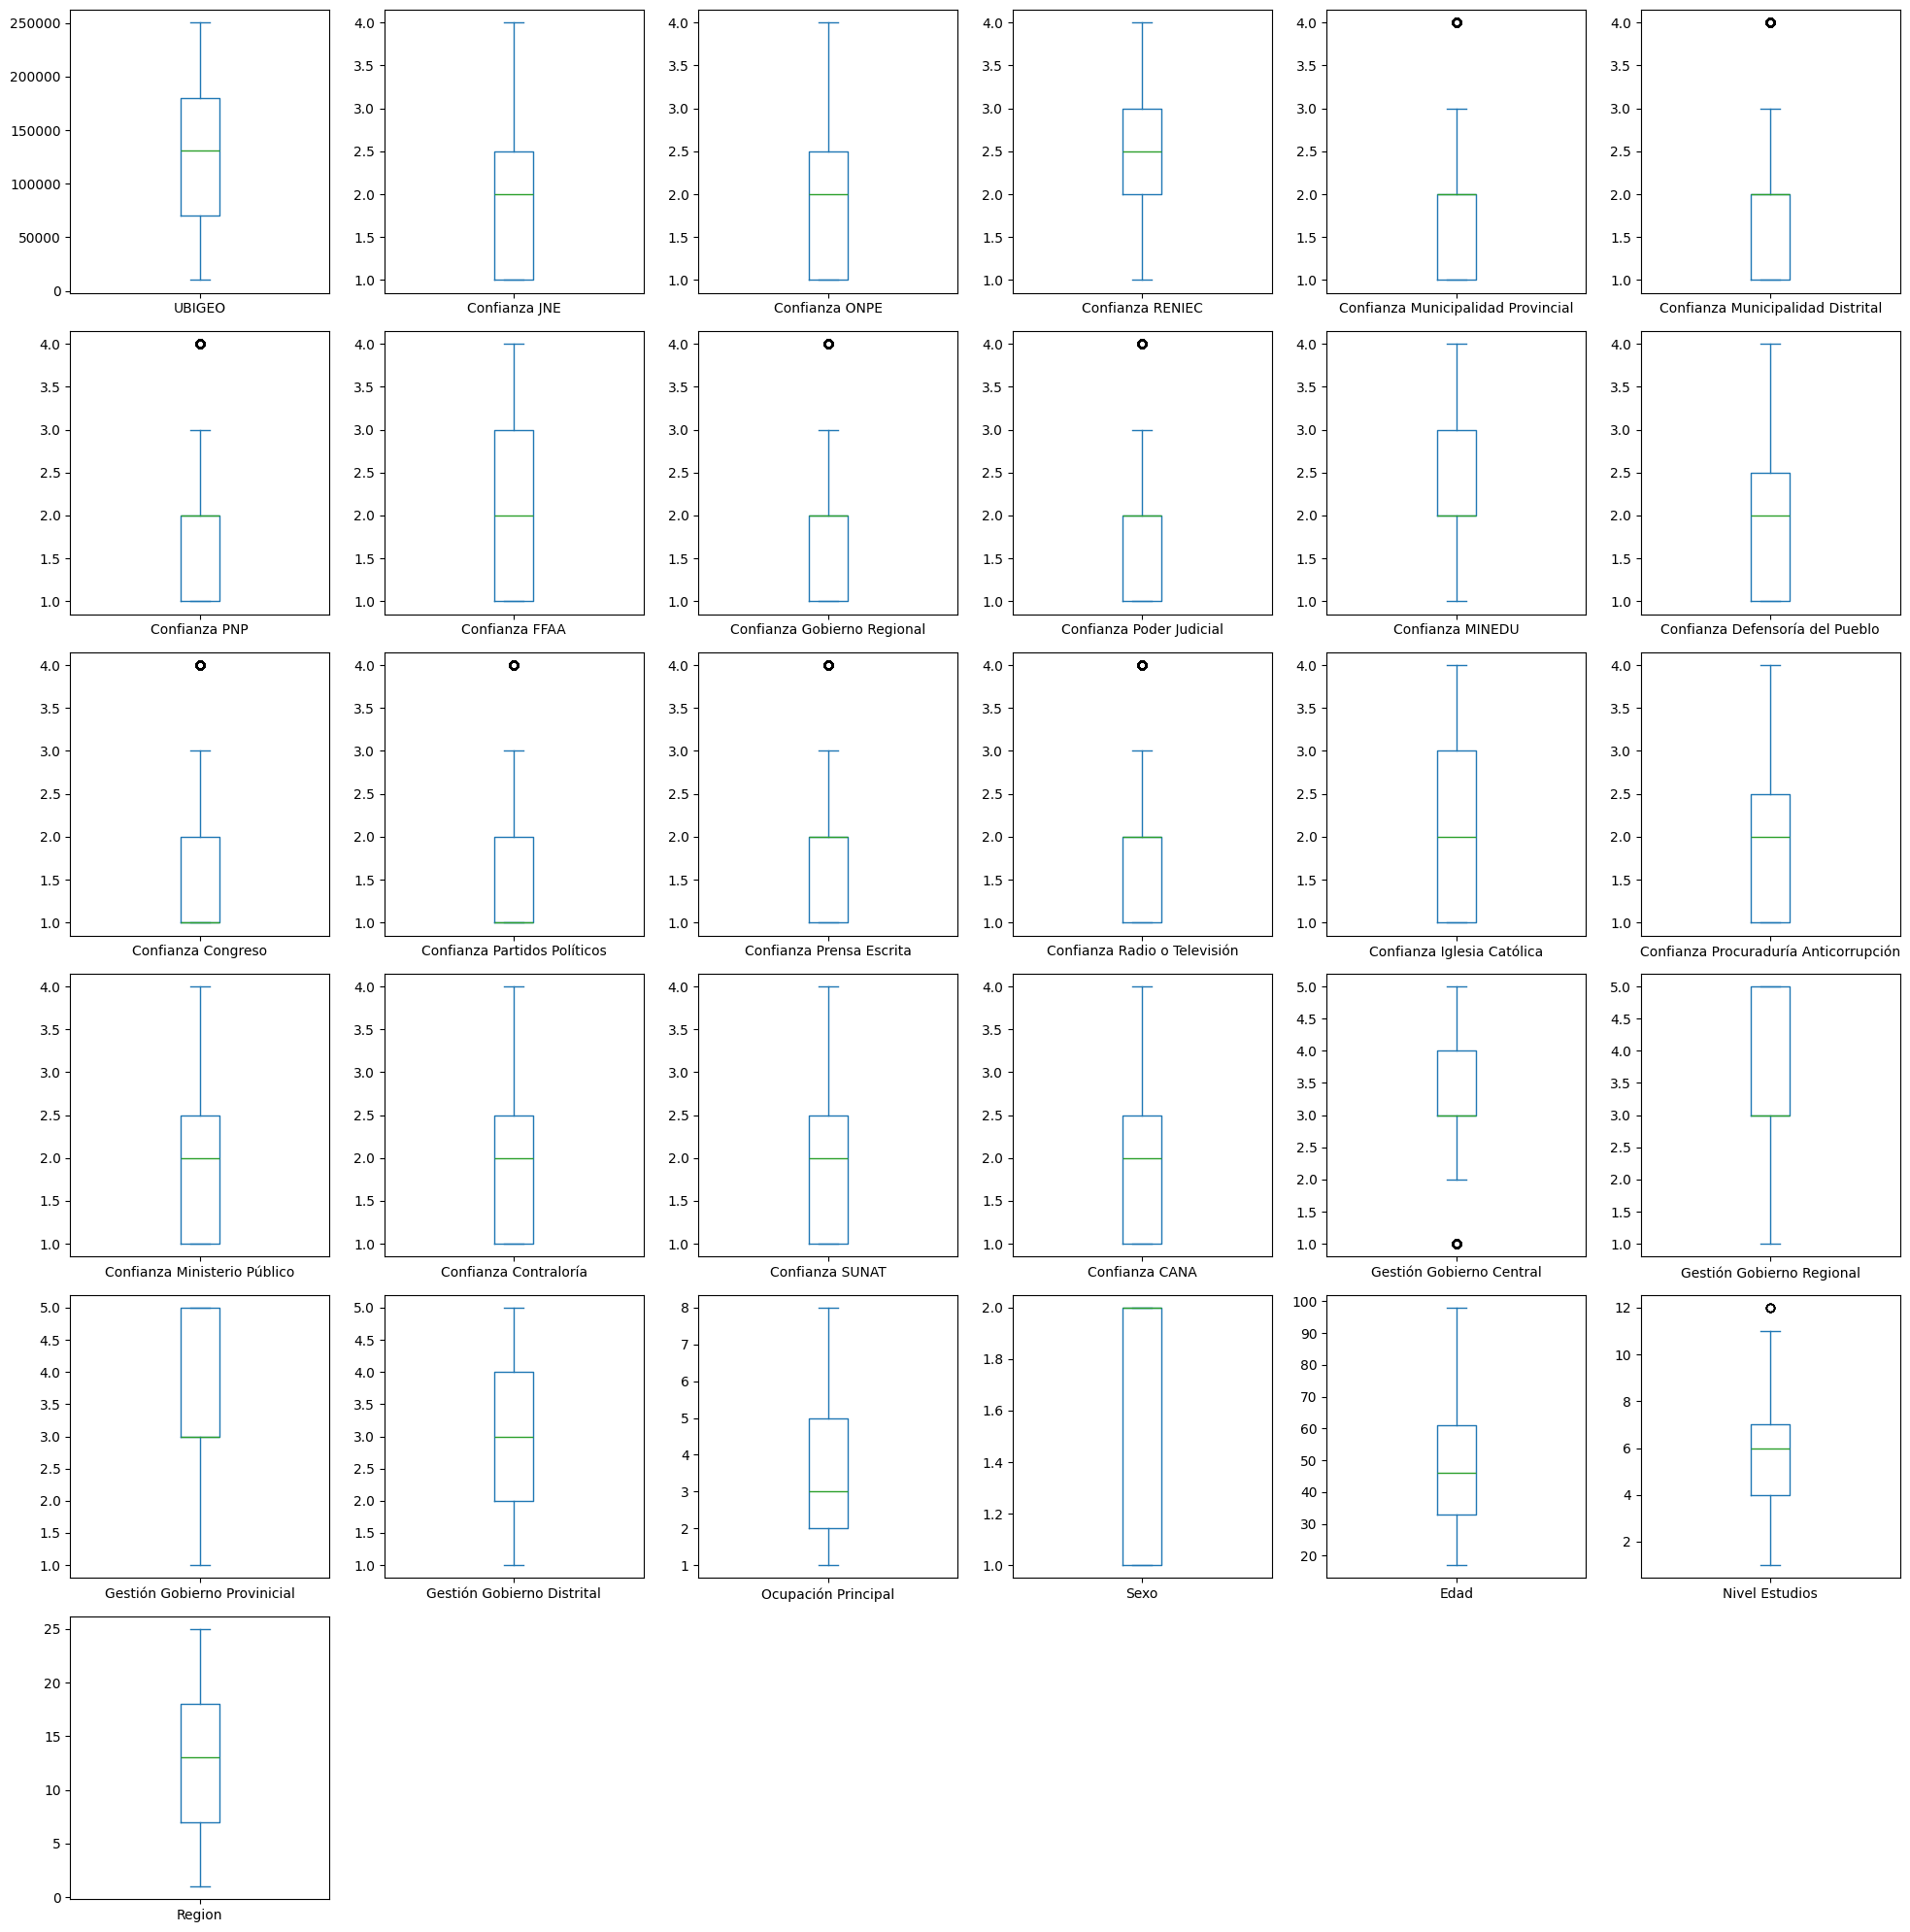

In [110]:
union_desagregada_num.plot(kind='box', layout=(6,6), subplots=True, figsize=(20, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

Observamos que, a pesar de haber realizado la limpieza inicial utilizando PyOD, aún se identifican algunos valores atípicos en los datos. Por lo tanto, se procederá a su tratamiento mediante el método del rango intercuartílico para abordar estas discrepancias.

In [111]:
for col in union_desagregada_num.columns:
    q1 = union_desagregada_num[col].quantile(0.25)
    q3 = union_desagregada_num[col].quantile(0.75)
    iqr= q3-q1
    li = q1-1.2*iqr
    ls = q3+1.5*iqr
    union_desagregada_num.loc[union_desagregada_num[col]<li,col]=li
    union_desagregada_num.loc[union_desagregada_num[col]>ls,col]=ls

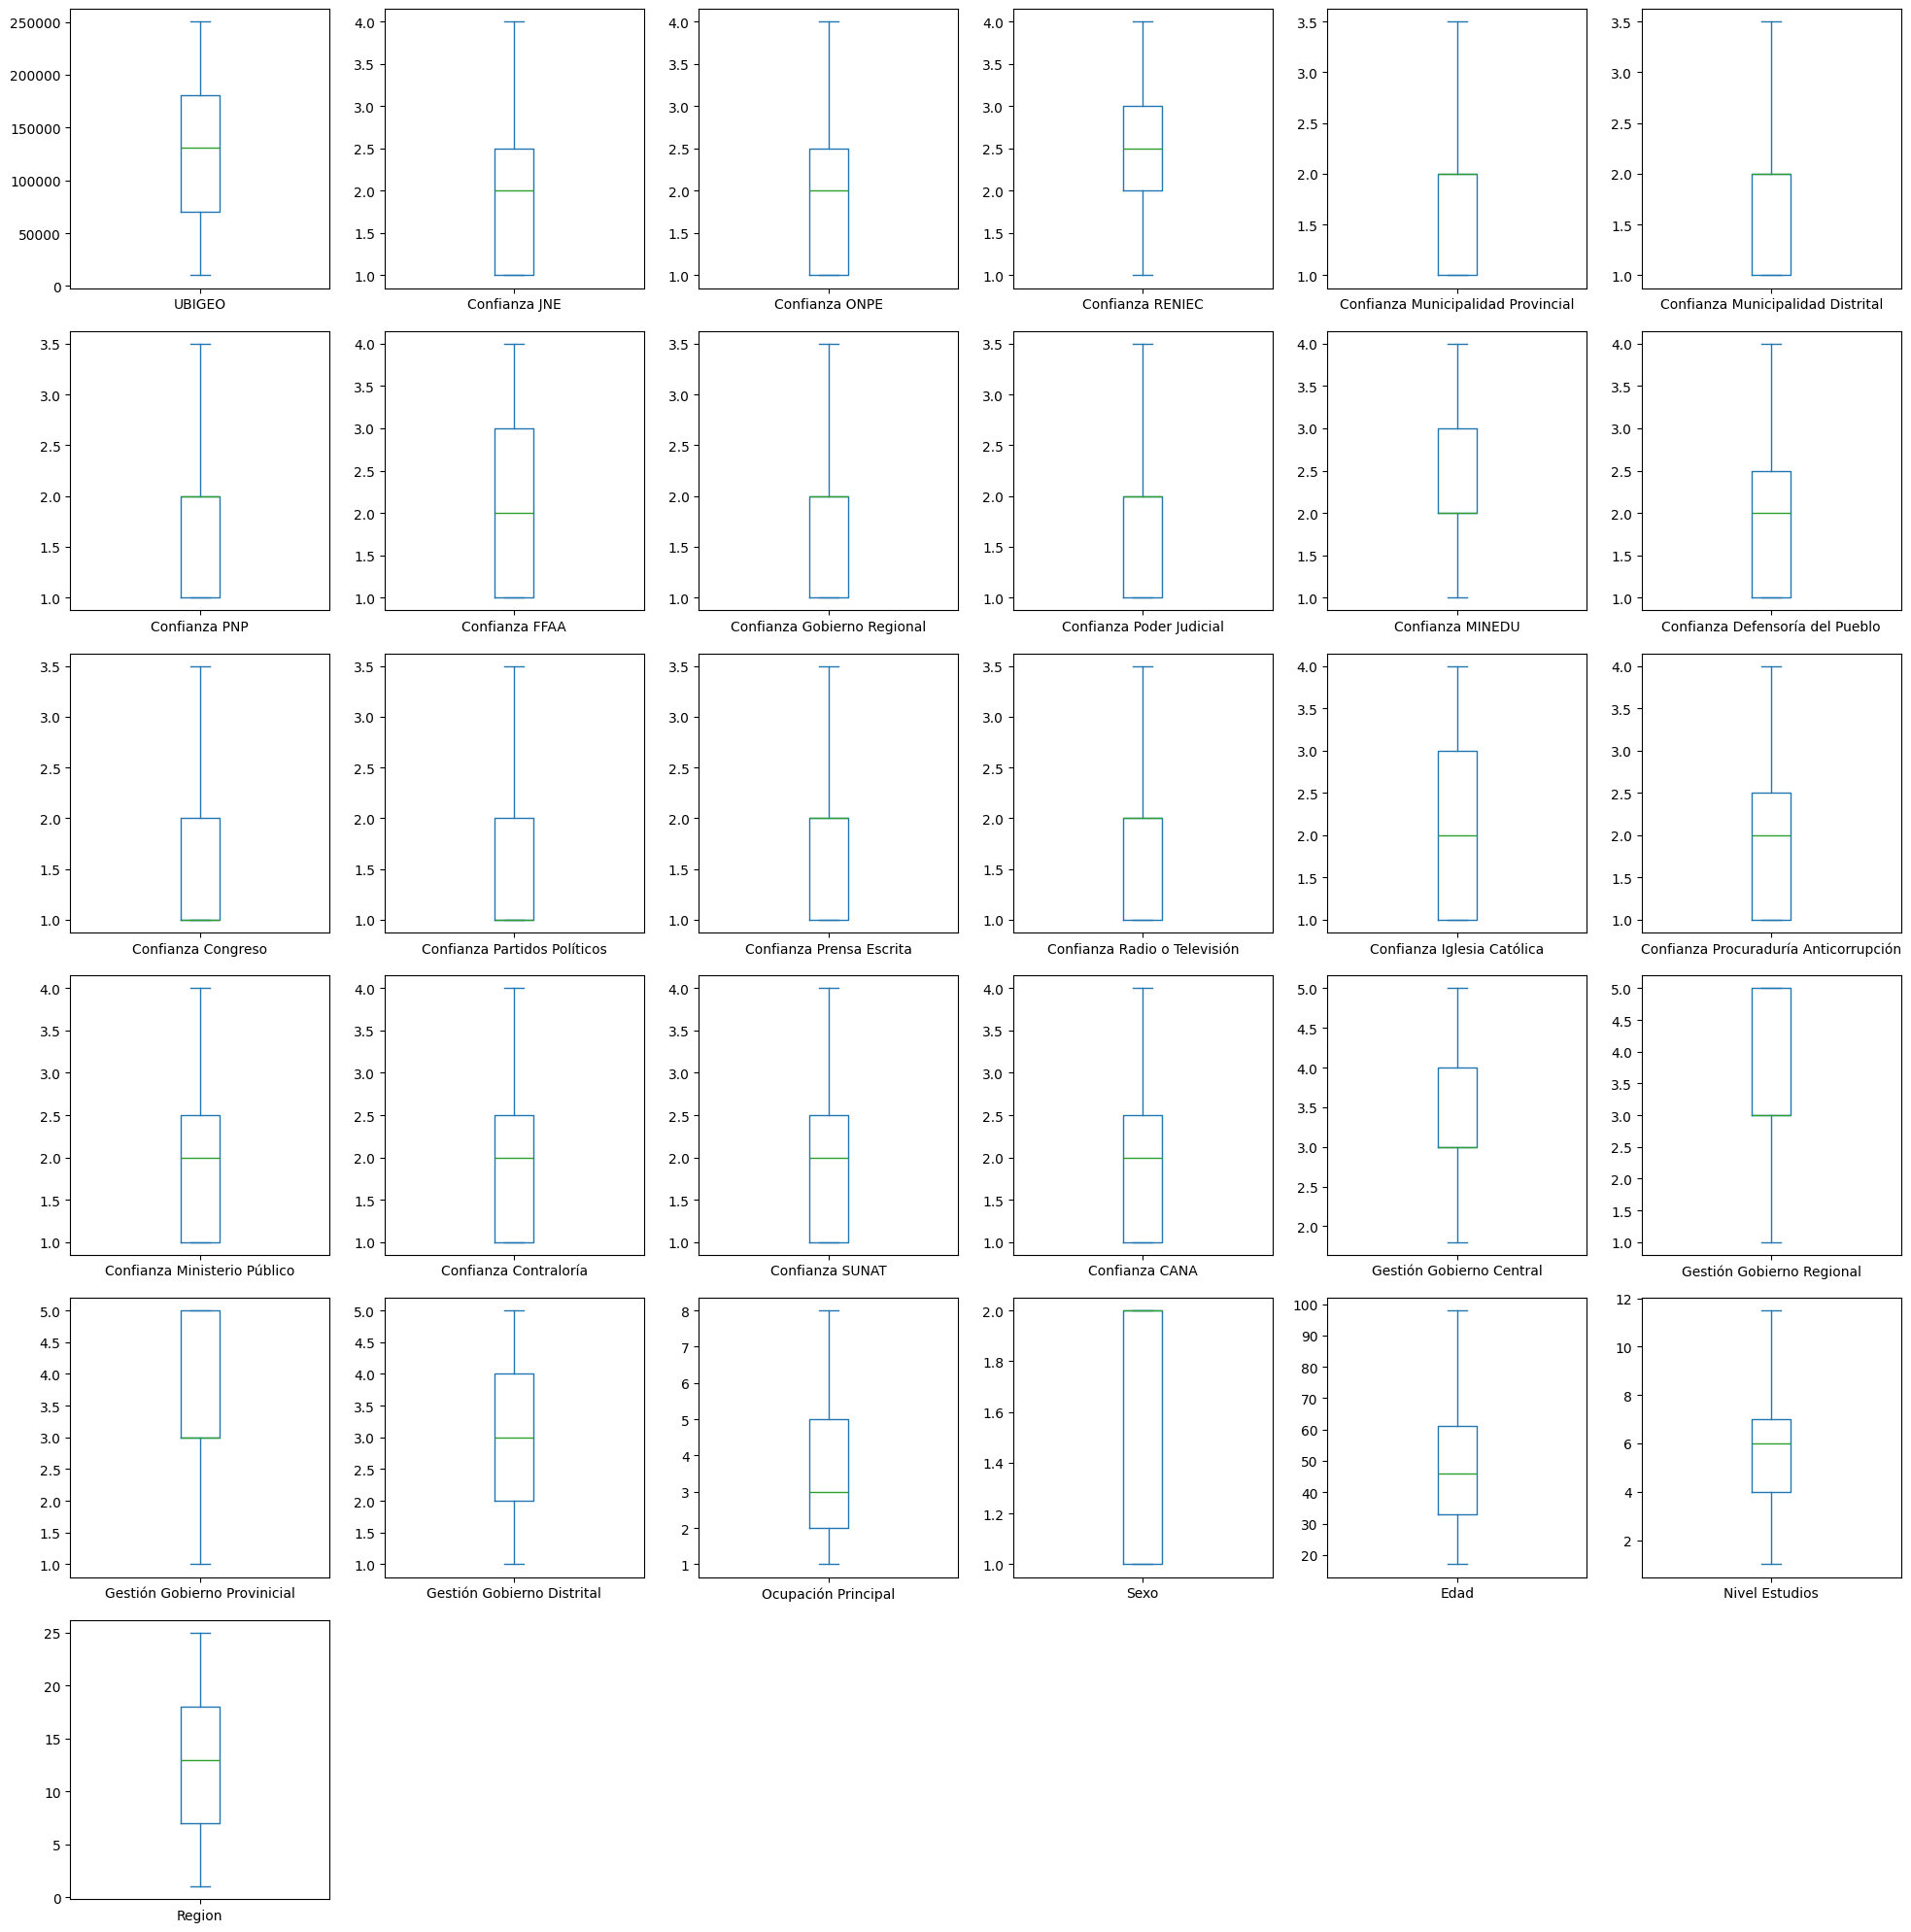

In [112]:
union_desagregada_num.plot(kind='box', layout=(6,6), subplots=True, figsize=(20, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [113]:
datos_categoricos = union_desagregada.select_dtypes(exclude=[np.number])
datos_categoricos = datos_categoricos.loc[union_desagregada_num.index]
datos_finales = pd.concat([union_desagregada_num, datos_categoricos], axis=1)


# Transformación: Estandarización y rescalamiento de los datos

In [114]:
# num = union_agregada.select_dtypes(include=[np.number])
# scaler_standard = StandardScaler()
# scaler_minmax = MinMaxScaler(feature_range=(0,1))

# std_df_agregado = pd.DataFrame(scaler_standard.fit_transform(num), columns=num.columns)
# minmax_df_agregado = pd.DataFrame(scaler_minmax.fit_transform(num), columns=num.columns)


In [115]:
datos_finales = datos_finales.loc[datos_finales['REGION'] == 'LIMA']

In [116]:
num = datos_finales.select_dtypes(include=[np.number])
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler(feature_range=(0,1))

std_df_desagregado = pd.DataFrame(scaler_standard.fit_transform(num), columns=num.columns)
minmax_df_desagregado = pd.DataFrame(scaler_minmax.fit_transform(num), columns=num.columns)

# Reducción Dimensional

## Estadístico de Hopkins

In [117]:
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors

In [118]:

def hopkins_statistic(X):
    
    sample_size = int(X.shape[0]*0.05) 
    
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] 
    
   
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
  
    w_distances = w_distances[: , 1]
    
 
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    H = u_sum/ (u_sum + w_sum)
    return H

## PCA

Usaremos PCA para la reducción; primero, se identifica la cantidad adecuada de componentes.

In [119]:
from sklearn.decomposition import PCA

Text(0.5, 1.0, 'Gráfico de codo PCA')

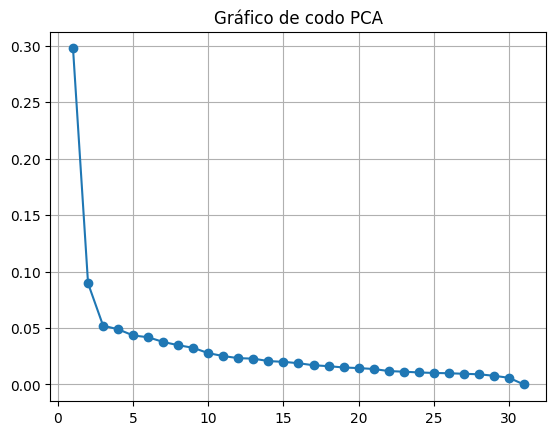

In [120]:
pca = PCA(n_components = std_df_desagregado.shape[1])
pca.fit(std_df_desagregado)
desempeño = pca.explained_variance_ratio_
plt.plot(range(1, std_df_desagregado.shape[1] + 1), desempeño, 'o-')
plt.grid()
plt.title("Gráfico de codo PCA")

Elegimos la cantidad de componentes de acuerdo con lo que exhibe el gráfico de codo. En este caso, definimos tres componentes.

In [121]:
pca = PCA(n_components = 3)
x_pca = pd.DataFrame(pca.fit_transform(std_df_desagregado), columns = ['c1','c2', 'c3'])

Calculamos el estadístico de Hopkins para la data reducida con PCA

In [123]:
hopkins_statistic(x_pca.values)

0.8272378137270316

## t_SNE

### Optimizador de hiper-parámetros del t-SNE

El siguiente algoritmo nos permitirá recorrer las configuraciones de hiper-parámetros de la técnica t-SNE. Esto con la finalidad de obtener la mejor configuración para un posterior análisis de clusters.

In [124]:
#CUIDADO -----------------------> NO CORRER, DEMORA MUCHO. PARA SEGUIR TRABAJANDO, USE EL CÓDIGO QUE SE ENCUENTRA MÁS ADELANTE
#------------------------------->
perplexities = [5, 30, 50, 100]
iterations = [300, 500, 1000]
components = [2,3]
CONFIGURACION_TSNE = {}
HOPKINS_TSNE = []

#fig, axs = plt.subplots(len(perplexities), len(iterations), figsize=(15, 12))
config = 0
for i, perp in enumerate(perplexities):
    for j, n_iter in enumerate(iterations):
        for k,n_com in enumerate(components):
            tsne = TSNE(n_components=n_com, random_state=42, perplexity=perp, n_iter=n_iter)
            
            X_tsne = tsne.fit_transform(minmax_df_desagregado) 
            CONFIGURACION_TSNE[config] = f"per={perp}|iter={n_iter}|comp={n_com}"
            config+=1
            HOPKINS_TSNE+= [hopkins_statistic(X_tsne)]


        #axs[i, j].scatter(X_tsne[:, 0], X_tsne[:, 1], s=5)
        #axs[i, j].set_title(f'Perplexity: {perp}, Iterations: {n_iter}')
        #axs[i, j].set_xticks([])
        #axs[i, j].set_yticks([])

#plt.tight_layout(rect=[0, 0, 1, 0.96])
#plt.show()


Text(0, 0.5, 'Valor del estadístico')

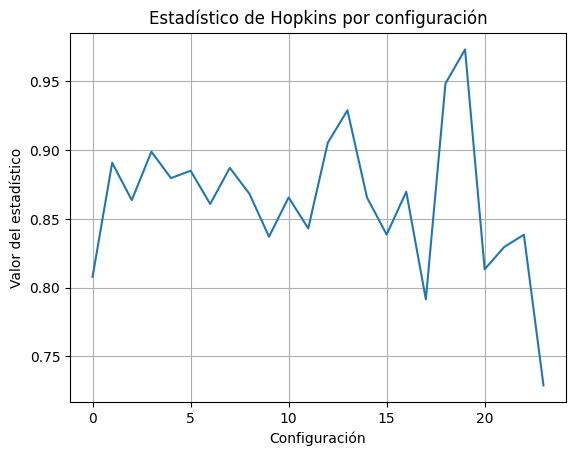

In [129]:
plt.plot(CONFIGURACION_TSNE.keys(), HOPKINS_TSNE)
plt.grid()
plt.title('Estadístico de Hopkins por configuración')
plt.xlabel('Configuración')
plt.ylabel('Valor del estadístico')

Seleccionamos la configuración óptima. Es aquella que minimice el valor del estadístico de Hopkins. Idealmente, debe ser menor que 0.5 para pasar la prueba de uniformidad; es decir, que la data no tiene una distribución uniforme. No obstante, ningún resultado lo satisface. Por lo tanto, nos quedamos con el menor valor posible.

### Visualización del t-SNE

In [130]:
CONFIGURACION_TSNE[19]

'per=100|iter=300|comp=3'

In [133]:
HOPKINS_TSNE[19]

0.9731681407236533

In [131]:
# ATENCIÓN --------> Este es el código que debe correr para obtener la data reducida
# -------------------------------------
tsne = TSNE(n_components=3, random_state=42, perplexity=100, n_iter=300)

X_tsne = tsne.fit_transform(minmax_df_desagregado) 

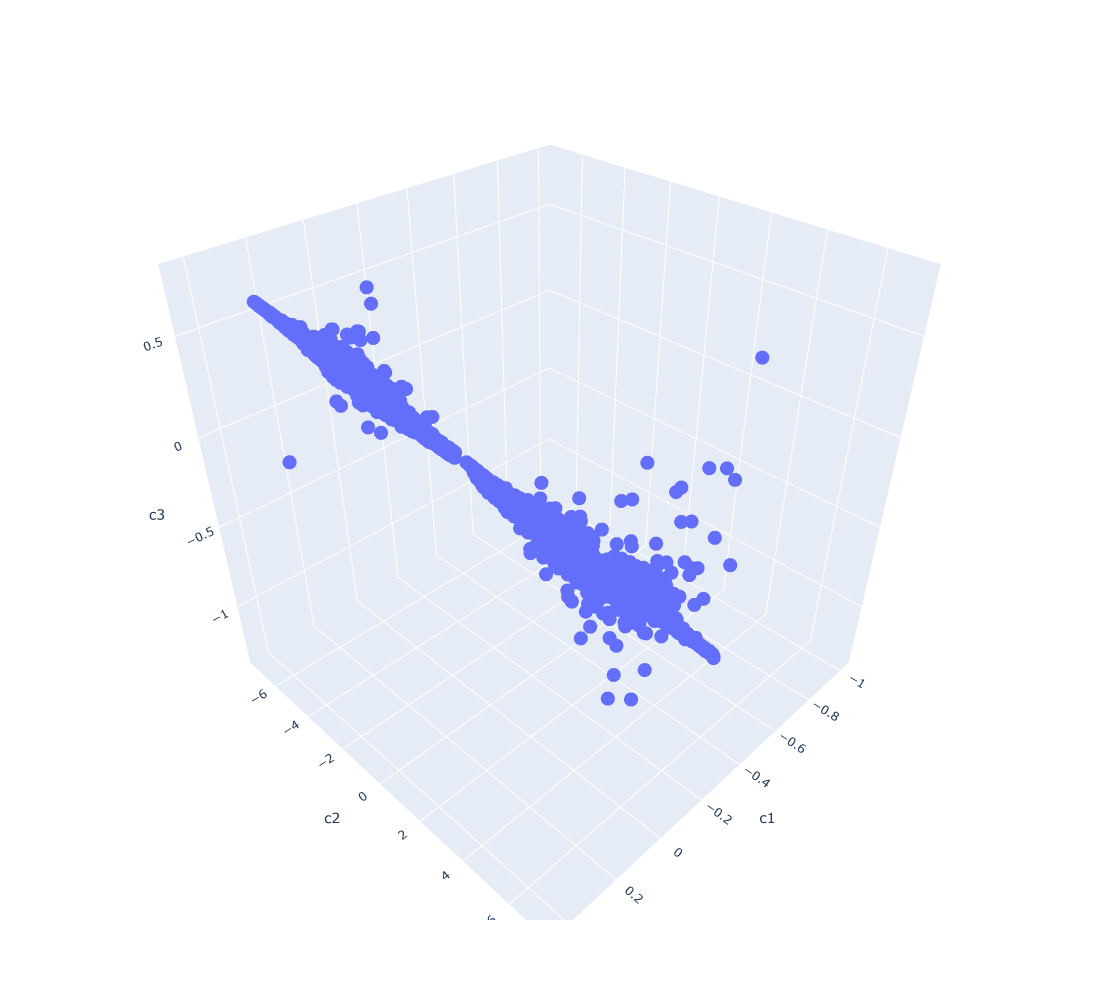

In [132]:
D = pd.DataFrame(X_tsne, columns = ['c1','c2','c3'])
import plotly.express as px

px.scatter_3d(data_frame = D, x='c1', y='c2', z='c3', width=1000, height=1000)

Los valores bajos de perplexity, como 5, pueden mostrar un agrupamiento excesivo que puede perder detalles de las relaciones más globales en los datos, mientras que los valores altos de perplexity, como 100, tienden a ser más adecuados para representar estructuras globales pero pueden suavizar demasiado los detalles locales.

Respecto al número de iteraciones, con un número insuficiente de iteraciones, como 300, los datos pueden no estar completamente ajustados, resultando en una visualización más "cruda", mientras que con 100, permiten que el algoritmo converja mejor, pero un número excesivo puede llevar a sobreajustes o no agregar valor adicional.

Se decide entonces elegir perplexity de 100 con iteraciones de 300, ya que estos parámetros logran un buen balance entre estructuras globales y detalles locales, y las iteraciones son suficientes para una convergencia adecuada.

## UMAP

### Técnica UMAP

### Optimización de hiper-parámetros del UMAP

In [125]:
#CUIDADO -----------------------> NO CORRER, DEMORA MUCHO. PARA SEGUIR TRABAJANDO, USE EL CÓDIGO QUE SE ENCUENTRA MÁS ADELANTE
#------------------------------->

n_neighbors = [5, 30, 50, 100]
n_epocas= [200, 500, 1000]
n_componentes = [2,3]
CONFIGURACION_UMAP = {}
HOPKINS_UMAP = []

config=0
#fig, axs = plt.subplots(len(n_neighbors), len(n_epocas), figsize=(15, 12))
for i, n_neighbors in enumerate(n_neighbors):
    for j, n_epochs in enumerate(n_epocas):
        for k, n_com in enumerate(n_componentes):
            
            reducer = umap.UMAP(n_components=n_com, n_neighbors=n_neighbors, n_epochs=n_epochs, random_state=42)
            embedding = reducer.fit_transform(minmax_df_desagregado) 
            CONFIGURACION_UMAP[config] = f"neighbors={n_neighbors}|epochs={n_epochs}|comp={n_com}"
            config+=1
            HOPKINS_UMAP+= [hopkins_statistic(embedding)]

        #axs[i, j].scatter(embedding[:, 0], embedding[:, 1], s=5)
        #axs[i, j].set_title(f'n_neighbors: {n_neighbors}, n_epochs: {n_epochs}')
        #axs[i, j].set_xticks([])
        #axs[i, j].set_yticks([])

#plt.tight_layout(rect=[0, 0, 1, 0.96])
#plt.suptitle("UMAP Projections with Different Parameters", fontsize=16)
#plt.show()


Text(0, 0.5, 'Valor del estadístico')

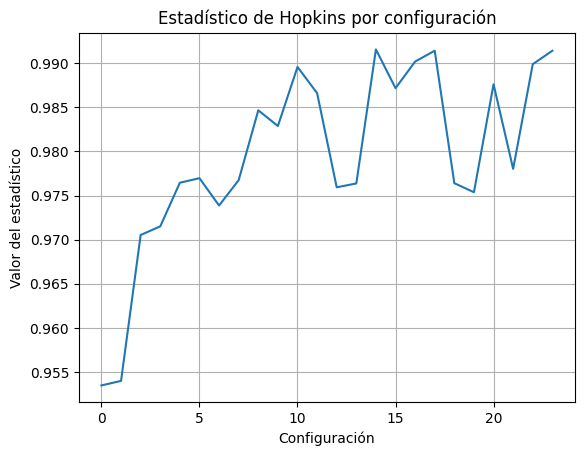

In [134]:
plt.plot(CONFIGURACION_UMAP.keys(), HOPKINS_UMAP)
plt.grid()
plt.title('Estadístico de Hopkins por configuración')
plt.xlabel('Configuración')
plt.ylabel('Valor del estadístico')

In [153]:
CONFIGS = pd.DataFrame({
    'configuracion_umap': CONFIGURACION_UMAP.values(),
    'estadistico_umap': HOPKINS_UMAP
})
CONFIGS.sort_values(by='estadistico_umap', ascending=False).head(1)

configuracion_umap  estadistico_umap
14  neighbors=50|epochs=500|comp=2           0.99156

La configuración óptima de UMAP para este análisis sería de n_neighbors = 50 con n_epochs = 500, ya que estas combinaciones logran un equilibrio entre la captura de detalles locales y la estructura global de los datos. Mientras que valores bajos de n_neighbors, como 5, enfatizan relaciones locales a expensas de la coherencia global, y valores altos, como 100, suavizan excesivamente los datos, las configuraciones intermedias ofrecen agrupaciones claras y coherentes. En cuanto a las iteraciones, 500 son suficientes para garantizar la convergencia sin incurrir en un costo computacional innecesario, mostrando proyecciones estables y consistentes.

### Visualización UMAP

In [154]:
reducer = umap.UMAP(n_components=2, n_neighbors=50, n_epochs=500, random_state=42)
embedding = reducer.fit_transform(minmax_df_desagregado)

In [156]:
umap_optimo = pd.DataFrame(embedding, columns = ['c1','c2'])

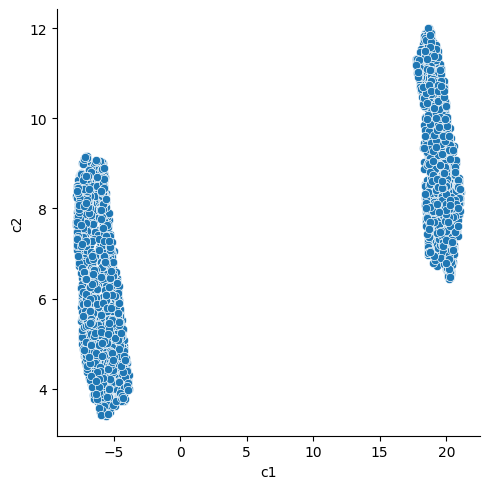

In [157]:
sns.relplot(data=umap_optimo, kind='scatter', x='c1', y= 'c2')

# Clustering
Para proceder con la clusterización se utilizará la data que fue escalada con MinMaxScaler

## Clustering jerárquico

### Complete

Asumimos preliminarmente que la forma del clúster es irregular

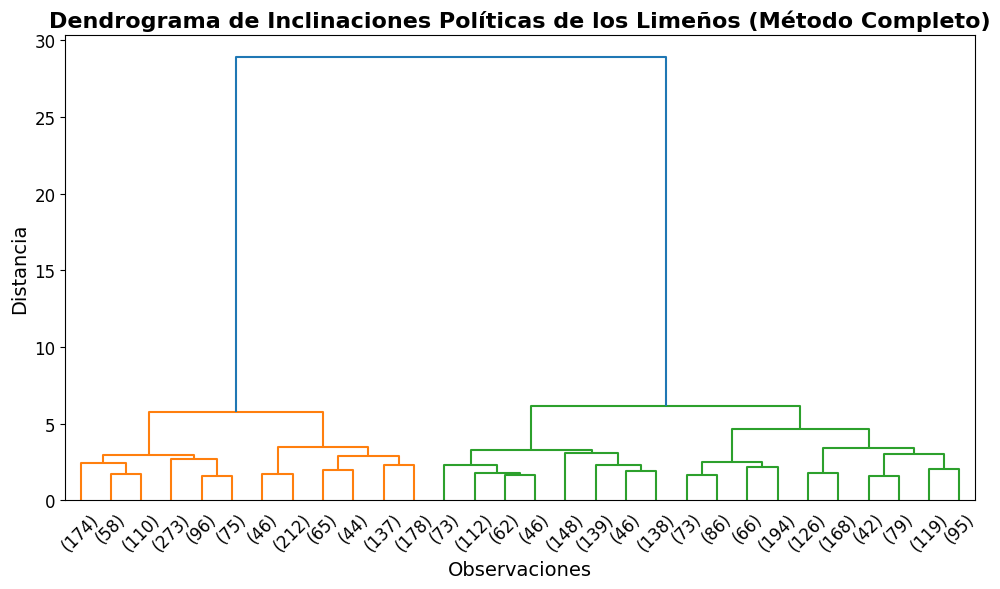

In [160]:
linked = shc.linkage(umap_optimo, method= 'complete')

plt.figure(figsize=(10, 6))
shc.dendrogram(linked, truncate_mode='lastp')

plt.title("Dendrograma de Inclinaciones Políticas de los Limeños (Método Completo)", fontsize=16, fontweight='bold')
plt.xlabel('Observaciones', fontsize=14)
plt.ylabel('Distancia', fontsize=14)

plt.gca().set_facecolor('white')
plt.grid(False)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

En este caso, se pueden distinguir 4 agrupaciones que se subdividen y asemejan en la medida en la que se encuentran más abajo, precisamente por la meno distancia entre las mismas.

### Ward
Asumimos que los clústeres tienen una apariencia más compacta y, por tanto, sus bifurcacines son más balanceadas.

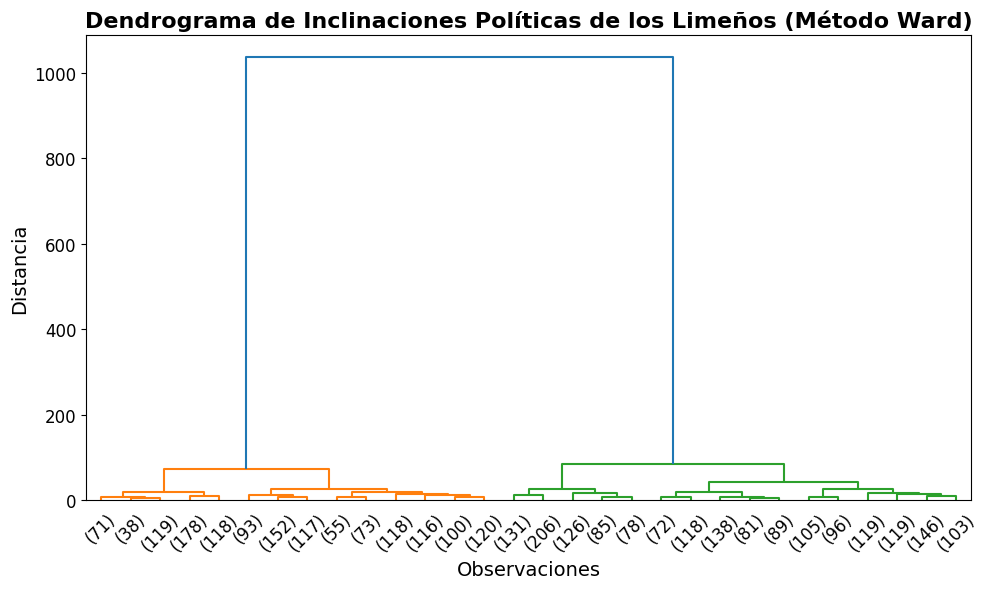

In [161]:
linked4 = shc.linkage(umap_optimo, method= 'ward')

plt.figure(figsize=(10, 6))
shc.dendrogram(linked4, truncate_mode='lastp')

plt.title("Dendrograma de Inclinaciones Políticas de los Limeños (Método Ward)", fontsize=16, fontweight='bold')
plt.xlabel('Observaciones', fontsize=14)
plt.ylabel('Distancia', fontsize=14)

plt.gca().set_facecolor('white')
plt.grid(False)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
plt.show()

Con el método Ward, se distinguen claramente 2 clusters principales. La altura en la que acontece esta división sugiere una fuerte diferenciación entre los mismos.

## Clustering via K-Means

Luego, estos scores podrán se evaluados gráficamente para determinar el número de clústers más adecuado.

### K-Means con UMAP

Aplicamos la técnica de clusterización con datos reducidos con UMAP

In [162]:
NumClu = range(1, 10)
kmeans = [KMeans(n_clusters=i, n_init='auto') for i in NumClu]


X_kmeans_umap = umap_optimo.copy()
X_kmeans_umap.head()

c1        c2
0  20.761440  7.977818
1  -5.765458  8.830280
2  19.683249  9.007428
3  -5.711514  8.176483
4  19.642818  9.282071

In [164]:
score = [kmeans[i].fit(X_kmeans_umap).score(X_kmeans_umap) for i in range(len(kmeans))]
print("Score:")
score

Score:


[-547304.0,
 -10302.19921875,
 -6613.8798828125,
 -3971.1787109375,
 -3535.00927734375,
 -2757.1123046875,
 -2226.8486328125,
 -1971.30078125,
 -1800.61083984375]

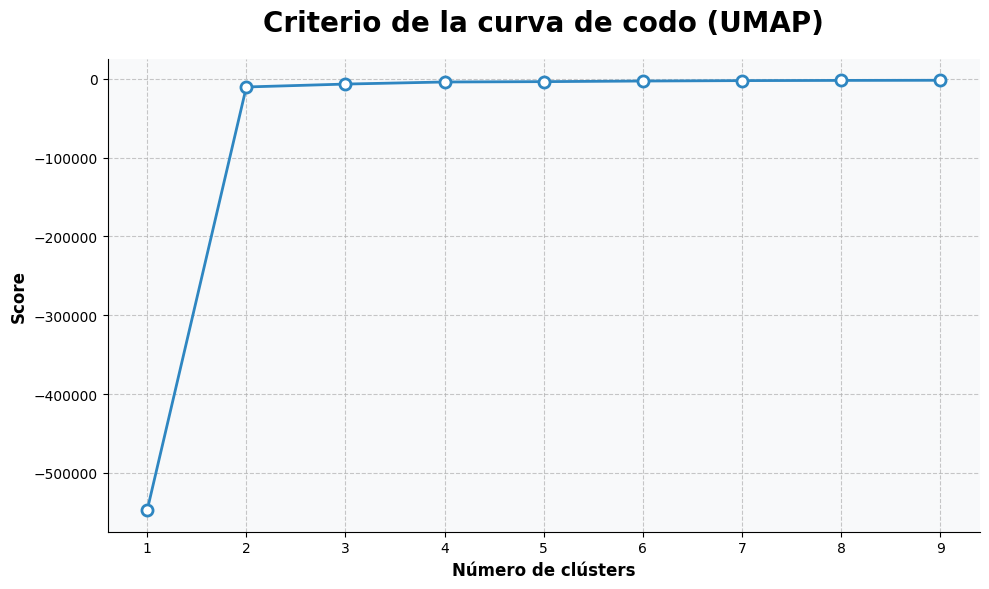

In [166]:
#plt.style.use('seaborn')  
plt.figure(figsize=(10, 6))
plt.plot(NumClu, score, 
         marker='o',                
         color='#2E86C1',          
         linewidth=2,              
         markersize=8,             
         markerfacecolor='white',  
         markeredgecolor='#2E86C1',
         markeredgewidth=2)        

plt.xlabel('Número de clústers', fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=12, fontweight='bold')

plt.title('Criterio de la curva de codo (UMAP)', 
          fontsize=20, 
          fontweight='bold', 
          pad=20)  

plt.grid(True, linestyle='--', alpha=0.7)

# Personalizar los bordes
plt.gca().spines['top'].set_visible(False)    
plt.gca().spines['right'].set_visible(False)  

plt.tight_layout()

# Personalizar los ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.gca().set_facecolor('#f8f9fa')

plt.show()


La curva de codo indica que el número más adecuado de clústers a seleccionar es 2. Por ser la técnica de reducción que menor impacto provoca a la forma del clúster que se distingue preliminarmente, s utilizará este gráfico para referirnos al criterio de selección de clústeres de manera general.

In [167]:
kmeans = KMeans(init = "k-means++", n_clusters= 2, n_init = 20)
# Ejecuta el algoritmo kmean configurado en los datos X
kmeans.fit(X_kmeans_umap)

centroids = kmeans.cluster_centers_
print("Centroides: ")
print(centroids)

labels = kmeans.labels_
labels_umap = labels
print("\nEtiquetas (labels):")
print(labels)

C = kmeans.cluster_centers_
print("\nCentros:")
C


Centroides: 
[[-6.0691285  6.064707 ]
 [19.480688   9.125841 ]]

Etiquetas (labels):
[1 0 1 ... 1 1 1]

Centros:


array([[-6.0691285,  6.064707 ],
       [19.480688 ,  9.125841 ]], dtype=float32)

In [170]:
X_kmeans_umap['kmeans_labels'] = labels_umap

Text(0.5, 1.0, 'Clusters hallados con K-Means')

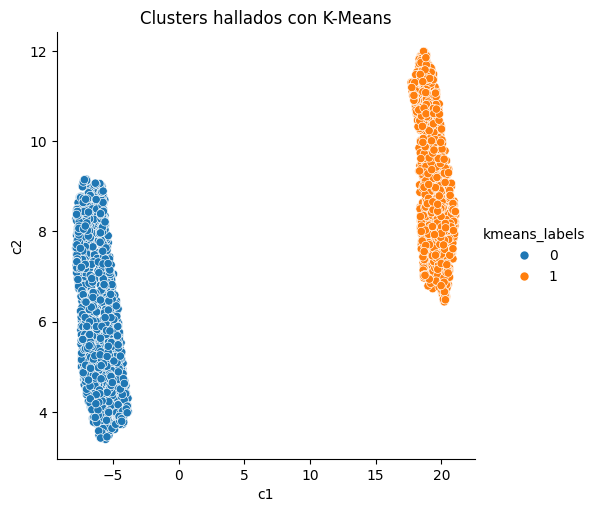

In [173]:
sns.relplot(data= X_kmeans_umap, kind= 'scatter', x='c1',y='c2', hue='kmeans_labels',)
plt.title("Clusters hallados con K-Means")

Se distinguen dos grupos claramente diferenciados que apoyan el análisis preliminar obtenidos con la visualización de dendogramas desarrollados con el método Ward. Aún así, es preciso resaltar  que la técnica de K-Means se ajusta mejor a la agrupación esférica y que las formas obtenidas suponen un desafío para sus limitaciones como veremos más adelante


## Clustering DBSCAN

### Aplicación al dataset desagregado
Dado que DB-SCAN es una técnica sensible a la escala de los datos, es preciso trabajar con datos reescalado según MinMaxScaler o StandardScaler. Primero, aplicamos la técnica al dataset íntegro de atributos seleccionados y reescalados.

In [175]:
from sklearn.cluster import DBSCAN

In [177]:
# Parámetros escogidos para el DBSCAN
epsilon = 0.2
minSamples= 5
dbscan = DBSCAN(eps=epsilon, min_samples=minSamples)

labels = dbscan.fit_predict(umap_optimo)

# Imprimir las etiquetas (técnica abreviada)
print("Etiquetas:")
print(labels)
print("\nNúmero de muestras agrupadas:")
print(len(dbscan.core_sample_indices_))

Etiquetas:
[0 1 0 ... 0 0 0]

Número de muestras agrupadas:
3233


In [178]:
df_x_dbscan = pd.DataFrame(umap_optimo, columns = umap_optimo.columns)
df_y_dbscan = pd.DataFrame(labels, columns = ["Labels"])
df_x_y_dbscan = pd.concat([df_x_dbscan,df_y_dbscan],axis = 1)

g_dbscan = df_x_y_dbscan[df_x_y_dbscan["Labels"]>-1].copy()

Esta vista es más fácil de visualizar a través de técnicas de reducción de componentes.

### DBSCAN UMAP

In [179]:
# Parámetros escogidos para el DBSCAN con reducción de componentes
epsilon = 0.2
minSamples= 5
dbscan = DBSCAN(eps=epsilon, min_samples=minSamples)

labels3 = dbscan.fit_predict(umap_optimo)

# Imprimir las etiquetas (técnica abreviada)
print("Etiquetas:")
print(labels3)
print("\nNúmero de muestras agrupadas:")
print(len(dbscan.core_sample_indices_))

Etiquetas:
[0 1 0 ... 0 0 0]

Número de muestras agrupadas:
3233


In [180]:
df_x_dbscan2 = pd.DataFrame(umap_optimo, columns = umap_optimo.columns)
df_y_dbscan2 = pd.DataFrame(labels3, columns = ["Labels"])
df_x_y_dbscan2 = pd.concat([df_x_dbscan2,df_y_dbscan2],axis = 1)

g_dbscan2 = df_x_y_dbscan2[df_x_y_dbscan2["Labels"]>-1].copy()

g_dbscan2.head()

c1        c2  Labels
0  20.761440  7.977818       0
1  -5.765458  8.830280       1
2  19.683249  9.007428       0
3  -5.711514  8.176483       1
4  19.642818  9.282071       0

Text(0.5, 1.0, 'Clusters hallados con DBSCAN')

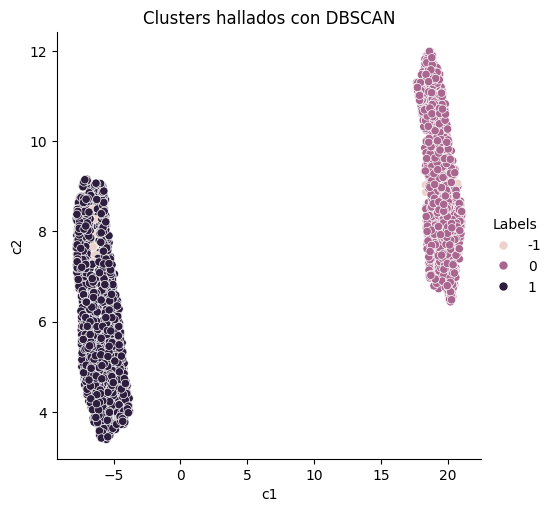

In [247]:
sns.relplot(data=df_x_y_dbscan2, kind='scatter', x='c1',y='c2', hue='Labels')
plt.title('Clusters hallados con DBSCAN')

Se obtienen dos grupos claramente diferenciados y distanciados en un arreglo parecido al obtenido con K-Means (UMAP). 

## Métricas de clústers 

In [183]:
# Función para evitar las métricas de la clusterización

def evaluar_clustering(etiquetas_verdaderas, etiquetas_predichas):
    
    nmi = normalized_mutual_info_score(etiquetas_verdaderas, etiquetas_predichas)
    v_measure = v_measure_score(etiquetas_verdaderas, etiquetas_predichas)
    ari = adjusted_rand_score(etiquetas_verdaderas, etiquetas_predichas)
    
    # CreaMOS dataframes con resultados
    metricas = {
        'Métrica': ['NMI', 'V-measure', 'ARI'],
        'Valor': [nmi, v_measure, ari]
    }
    df_metricas = pd.DataFrame(metricas)
    
    # Crear visualización
    plt.figure(figsize=(10, 6))
    grafico = sns.barplot(data=df_metricas, x='Métrica', y='Valor', 
                         palette='viridis')
    
    # Personalizar gráfico
    plt.title('Métricas de Evaluación del Clustering', 
             fontsize=14, pad=20, fontweight='bold')
    plt.ylabel('Puntuación', fontsize=12, fontweight='bold')
    
    # Agregar valores sobre las barras
    for i, valor in enumerate(df_metricas['Valor']):
        grafico.text(i, valor, f'{valor:.3f}', 
                    ha='center', va='bottom')
    
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return df_metricas

Métrica     Valor
0        NMI  0.978668
1  V-measure  0.978668
2        ARI  0.991105

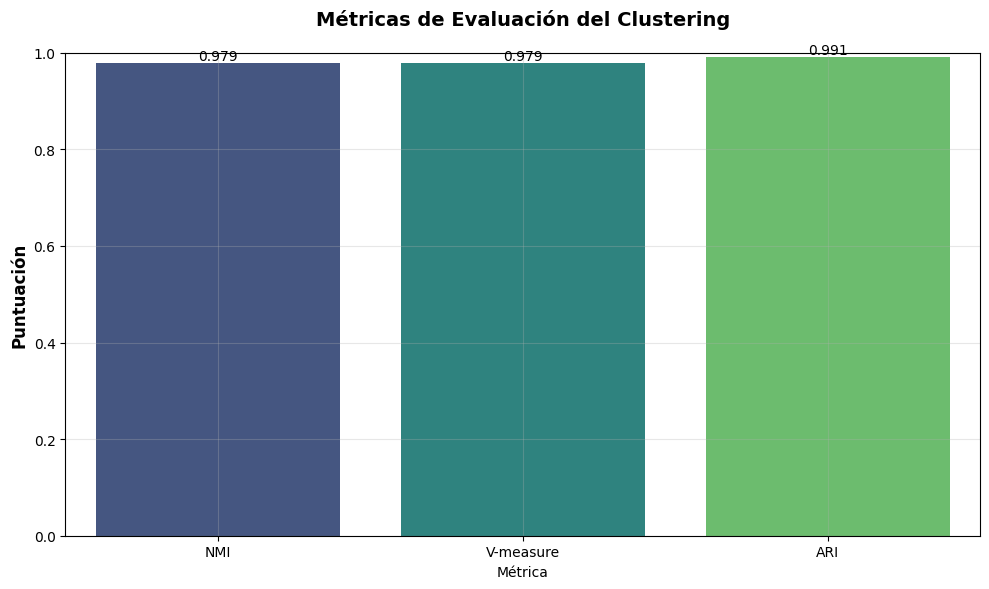

In [184]:
evaluar_clustering(labels_umap,labels3)    

Las métricas indican que los clústeres obtenidos a través de DSCAN y aquellos obtenidos por K-Means son muy similares entre sí. Esto valida la autenticidad de los clusters obtenidos. Por lo tanto, en adelante, se interpretará los clusters en función de las variables iniciales.

## Interpretación de los CLusters obtenidos

In [227]:
X_kmeans_umap['kmeans_labels'].unique()

array([1, 0])

In [198]:
datos_finales['Cluster'] = X_kmeans_umap['kmeans_labels']

In [206]:
CONFIANZAS = ['Confianza JNE', 'Confianza ONPE', 'Confianza RENIEC',
       'Confianza Municipalidad Provincial',
       'Confianza Municipalidad Distrital', 'Confianza PNP', 'Confianza FFAA',
       'Confianza Gobierno Regional', 'Confianza Poder Judicial',
       'Confianza MINEDU', 'Confianza Defensoría del Pueblo',
       'Confianza Congreso', 'Confianza Partidos Políticos',
       'Confianza Prensa Escrita', 'Confianza Radio o Televisión',
       'Confianza Iglesia Católica', 'Confianza Procuraduría Anticorrupción',
       'Confianza Ministerio Público', 'Confianza Contraloría',
       'Confianza SUNAT', 'Confianza CANA']

In [239]:
cluster_numericos = datos_finales[CONFIANZAS + ['Cluster']].groupby(['Cluster']).mean().reset_index(drop=True).T.reset_index()

In [250]:
grafico = cluster_numericos.melt(id_vars = 'index', value_vars= [0.0,1.0], var_name='Cluster')

Text(0.5, 1.0, 'Confianza en instituciones ')

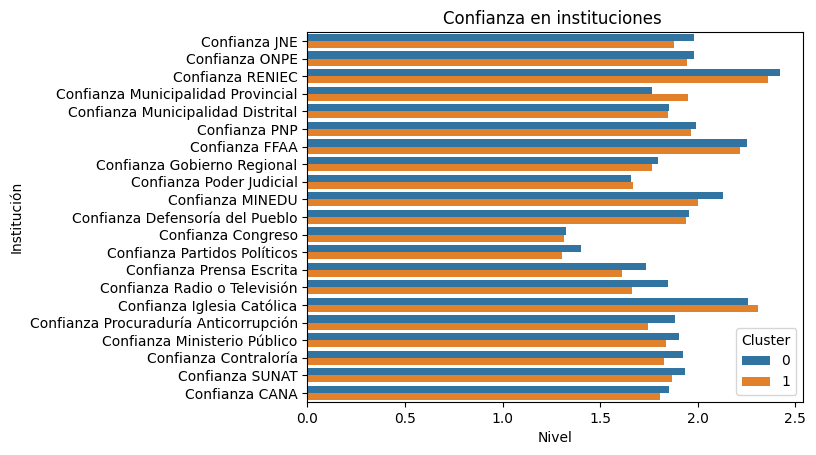

In [253]:
sns.barplot(data=grafico, x='value', y='index', hue='Cluster')
plt.ylabel('Institución')
plt.xlabel('Nivel')
plt.title('Confianza en instituciones ')

Aun cuando la diferencia entre los clusters es visualmente evidente, la diferenciación respecto de los niveles de confianza en las instituciones es ínfima. Se deduce que el método UMAP enfatizó estas sutiles diferencias entre clusters para realizar la separación de las observaciones. No obstante, al interpretar las variables originales, estas diferencias se disipan.

Visualización geográfica de los clusters

In [255]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

df = pd.read_excel(r"imtellinuthisisit.xlsx")
crs = "EPSG:4326"

geometry = [Point(xy) for xy in zip(df['LONGITUD_PROV'], df['LATITUD_PROV'])]
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
gdf.to_parquet(r"data_qgis_prov.geoparquet", engine="pyarrow")

# Union desagregada

In [212]:
union_agregada = pd.read_csv('union_agregada.csv')

In [213]:
del union_agregada['Unnamed: 0']

Eliminamos la columna del índice por defecto.

In [214]:
diccionario2 = {
    '2023': 'Salario Promedio',
    'P106': 'Precio Vivienda'
}

Para la exploración, renombramos las variables de salario medio y precio de vivienda.

In [215]:
union_agregada.rename(columns=diccionario, inplace = True)
union_agregada.rename(columns=diccionario2, inplace=True)

In [216]:
numericas = ['Salario Promedio', 'Confianza JNE',
       'Confianza ONPE', 'Confianza RENIEC',
       'Confianza Municipalidad Provincial',
       'Confianza Municipalidad Distrital', 'Confianza PNP', 'Confianza FFAA',
       'Confianza Gobierno Regional', 'Confianza Poder Judicial',
       'Confianza MINEDU', 'Confianza Defensoría del Pueblo',
       'Confianza Congreso', 'Confianza Partidos Políticos',
       'Confianza Prensa Escrita', 'Confianza Radio o Televisión',
       'Confianza Iglesia Católica', 'Confianza Procuraduría Anticorrupción',
       'Confianza Ministerio Público', 'Confianza Contraloría',
       'Confianza SUNAT', 'Confianza CANA']

Separamos en una lista a las variables numéricas para su posterior uso.

In [217]:
from sklearn.decomposition import NMF
NUMERICAS = union_agregada[numericas]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
NUMERICAS = scaler.fit_transform(NUMERICAS)
NUMERICAS = pd.DataFrame(NUMERICAS, columns = numericas)
model = NMF(n_components=2, init='random', random_state=42) 
W = model.fit_transform(NUMERICAS)
H = model.components_

Realizamos una transformación de los datos empleando la técnica NMF. Esta nos permitirá reducir las dimensiones del dataset e interpretar los componentes resultantes en función de las variables originales. Para esta tarea, se procedió a reescalar los datos previamente.

In [218]:
CONFIANZA_NMF = pd.DataFrame(W, columns = ['Componente1','Componente2'])

Extraemos dos componentes con la finalidad de poder visualizar la gráfica.

In [219]:
Reconstruccion = pd.concat([CONFIANZA_NMF, union_agregada['REGION']], axis=1)

Incluimos la región correspondiente a cada registro.

Text(0.5, 1.0, 'Diagrama de dispersión de las regiones')

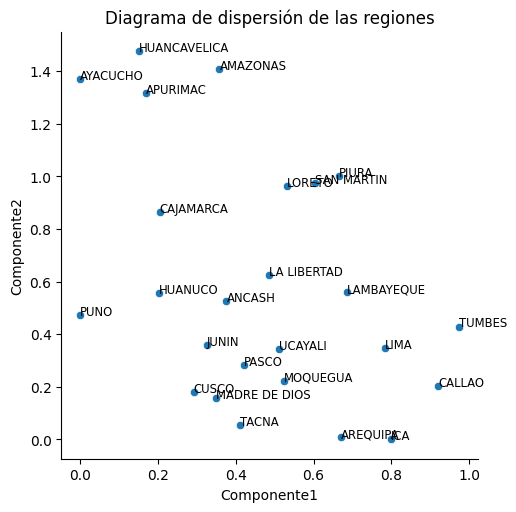

In [220]:
sns.relplot(data=Reconstruccion, kind='scatter', x='Componente1', y='Componente2')
for i in range(len(Reconstruccion)):
    plt.text(Reconstruccion['Componente1'][i], Reconstruccion['Componente2'][i], Reconstruccion['REGION'][i], 
             horizontalalignment='left', size='small', color='black')
plt.title('Diagrama de dispersión de las regiones')

Se observa en el gráfico algunas agrupaciones de regiones en diferentes punto del plano. Destacan Ayacucho, Apurímac, Huancavelica y Amazonas con un alto valor del componente 1 y bajo en el componente 2. Por otro lado, Callao, Ica, Arequipa exhiben el comportamiento inverso. Además, varias regiones de diversos sectores del país se ubican en un punto medio del componente 2 y un rango de 0.2 a 1.2 en el componente1.

In [221]:
composition = pd.DataFrame(H, columns= numericas)

Se investigará la composición de los componentes.

Text(86.79451388888889, 0.5, 'Variable')

<Figure size 800x600 with 0 Axes>

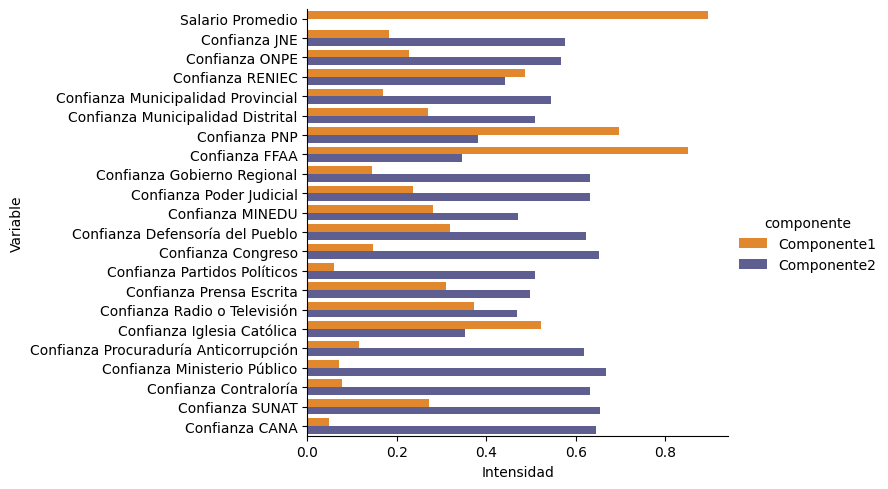

In [222]:
c = composition.T.rename(columns = {0:'Componente1', 1:'Componente2'}).reset_index()
cx = pd.melt(frame=c, id_vars='index', value_vars=['Componente1', 'Componente2'], var_name='componente' )
plt.figure(figsize=(8,6))
sns.catplot(data = cx,kind='bar', y='index', x='value', errorbar= None, hue='componente',aspect=1.6, palette = {
    'Componente1': '#f81',
    'Componente2': '#559'})
plt.xlabel('Intensidad')
plt.ylabel('Variable')

El gráfico muestra que el componente 1 tiene un alto valor de confianza en CANA, SUNAT, Contraloría, Ministerio Público, Procuraduría, Congreso, Defensoría del Pueblo, MINEDU, Poder judicial, Gobierno regional, ONPE y JNE. Por otro lado, el componente 2 tiene altos valores en Salario promedio, Precio vivienda, confianza en la PNP, confianza en las Fuerzas armadas, baja confianza en partidos políticos y alta confianza en la iglesia católica. Estos componentes son en general excluyentes; es decir, cuando uno tiene un valor alto en una variable, el otro componente tiene un valor bajo. Se destaca que para ambos componentes, la confianza en la RENIEC es alta.